<a href="https://colab.research.google.com/github/KhinMyatNandar/Project/blob/main/AIrline_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import dateutil as dparser
import re
import scipy.stats as stats
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [ ]:
AR=pd.read_csv('Airline_Review.csv')

In [ ]:
df=pd.DataFrame(AR)

2.Null Value

In [ ]:
df.isnull().sum()

Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

In [ ]:
df.dtypes

Passanger_Name     object
Flying_month       object
Route              object
Rating            float64
Verified           object
Review_title       object
Review_content     object
Traveller_type     object
Class              object
dtype: object

In [ ]:
df['Passanger_Name'].unique()

array(['Paige Boet', 'S Layne', 'E Lanewoski', ..., 'J Robertson',
       'S Luqman', 'Michael Dielissen'], dtype=object)

# **3. Check Class and build new column**

In [ ]:
df['Class'].unique

<bound method Series.unique of 0        Economy Class
1       Business Class
2         Solo Leisure
3        Economy Class
4       Family Leisure
             ...      
3575                no
3576                no
3577                no
3578               yes
3579               yes
Name: Class, Length: 3580, dtype: object>

In [ ]:
df.Class

0        Economy Class
1       Business Class
2         Solo Leisure
3        Economy Class
4       Family Leisure
             ...      
3575                no
3576                no
3577                no
3578               yes
3579               yes
Name: Class, Length: 3580, dtype: object

In [ ]:
Class_names=['Business Class', 'Economy Class', 'Premium Economy', 'First Class']

In [ ]:
#Create new 'nclass' Column
df['nClass'] = None

#move data
for index, row in df.iterrows():
    for column in ['Flying_month', 'Route', 'Class', 'Traveller_type']:
        if row[column] in Class_names:
            df.at[index, 'nClass'] = row[column]
            df.at[index, column] = 'FINISHED'
            break

In [ ]:
#Check Class_names
#def find_class(row):
    #for Class in Class_names:
        #if Class in str(row):
           # return Class
    #return None

In [ ]:
#Check Class_names
#def find_class(row):
  #Class_names= ['Business Class', 'Economy Class', 'Premium Economy', 'First Class']
 # return row['Class'] in Class_names

In [ ]:
df.head(10)

Passanger_Name                 Flying_month  \
0      Paige Boet                       Jun-23   
1         S Layne                       Mar-23   
2     E Lanewoski           Heathrow to Bodrum   
3     Joel Burman                       Jun-23   
4         R Vines         London City to Ibiza   
5          M King                       Jun-23   
6          C Dean          Amsterdam to London   
7  Richard Hodges  London Heathrow to Kalamata   
8  Carol Willmore                       Jun-23   
9   Nadine Kohler                       Jun-23   

                                      Route  Rating       Verified  \
0                     New Orleans to London     1.0  Trip Verified   
1                           London to Amman     1.0  Trip Verified   
2                                  FINISHED     2.0  Trip Verified   
3                           Amman to London     4.0   Not Verified   
4                                  FINISHED     7.0  Trip Verified   
5                      London to Washington     1.0  Trip Verified   
6                                  FINISHED     1.0  Trip Verified   
7                                  FINISHED     7.0  Trip Verified   
8                        London to Funchal      1.0   Not Verified   
9  Marseille to Seattle via London Heathrow     1.0   Not Verified   

                               Review_title  \
0               The airline lost my luggage   
1    fully refunded by our travel insurance   
2               no boarding drinks provided   
3                         WiFi didn't work    
4                        stick with economy   
5                 Communication is terrible   
6                  delays and cancellations   
7  Economy class seating was truly dreadful   
8              flight failed at every level   
9               BA refuses to make it right   

                                      Review_content  Traveller_type  \
0  The airline lost my luggage and was absolutely...    Solo Leisure   
1  We booked on the BA website, round trip flight...  Couple Leisure   
2  First time flying with BA business class, neve...        A321 neo   
3  You can buy sandwiches and crisps but don't ex...    Solo Leisure   
4  This is a two-for-one review covering economy ...     Embraer 190   
5  Absolutely horrible airline. Communication is ...  Couple Leisure   
6  Having experienced delays and cancellations de...            A350   
7  Travelled to Heathrow to Kalamata and return j...      Boeing 737   
8  This flight failed at every level. We were del...  Couple Leisure   
9  Beware of British Airways and their marketing ...  Family Leisure   

            Class          nClass  
0        FINISHED   Economy Class  
1        FINISHED  Business Class  
2    Solo Leisure  Business Class  
3        FINISHED   Economy Class  
4  Family Leisure  Business Class  
5        FINISHED   Economy Class  
6        Business  Business Class  
7  Couple Leisure   Economy Class  
8        FINISHED   Economy Class  
9        FINISHED   Economy Class

In [ ]:
# df1=df.copy()

In [ ]:
# Save into new file after processing
#df.to_csv('df.csv',index=False)

## **4. Check Traveller_type and build new column**

In [ ]:
df.Traveller_type

0         Solo Leisure
1       Couple Leisure
2             A321 neo
3         Solo Leisure
4          Embraer 190
             ...      
3575          FINISHED
3576          FINISHED
3577          FINISHED
3578          FINISHED
3579          FINISHED
Name: Traveller_type, Length: 3580, dtype: object

In [ ]:
Travellertype_names=['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business']

In [ ]:
#Create new 'nTravellertype' Column
df['nTravellertype'] = None
#Check Travellertype Names and move data
for index, row in df.iterrows():
    for column in ['Flying_month', 'Route', 'Class', 'Traveller_type']:
        if row[column] in Travellertype_names:
            df.at[index, 'nTravellertype'] = row[column]
            df.at[index, column] = 'FINISHED'
            break

In [ ]:
df.head(10)

Passanger_Name                 Flying_month  \
0      Paige Boet                       Jun-23   
1         S Layne                       Mar-23   
2     E Lanewoski           Heathrow to Bodrum   
3     Joel Burman                       Jun-23   
4         R Vines         London City to Ibiza   
5          M King                       Jun-23   
6          C Dean          Amsterdam to London   
7  Richard Hodges  London Heathrow to Kalamata   
8  Carol Willmore                       Jun-23   
9   Nadine Kohler                       Jun-23   

                                      Route  Rating       Verified  \
0                     New Orleans to London     1.0  Trip Verified   
1                           London to Amman     1.0  Trip Verified   
2                                  FINISHED     2.0  Trip Verified   
3                           Amman to London     4.0   Not Verified   
4                                  FINISHED     7.0  Trip Verified   
5                      London to Washington     1.0  Trip Verified   
6                                  FINISHED     1.0  Trip Verified   
7                                  FINISHED     7.0  Trip Verified   
8                        London to Funchal      1.0   Not Verified   
9  Marseille to Seattle via London Heathrow     1.0   Not Verified   

                               Review_title  \
0               The airline lost my luggage   
1    fully refunded by our travel insurance   
2               no boarding drinks provided   
3                         WiFi didn't work    
4                        stick with economy   
5                 Communication is terrible   
6                  delays and cancellations   
7  Economy class seating was truly dreadful   
8              flight failed at every level   
9               BA refuses to make it right   

                                      Review_content Traveller_type     Class  \
0  The airline lost my luggage and was absolutely...       FINISHED  FINISHED   
1  We booked on the BA website, round trip flight...       FINISHED  FINISHED   
2  First time flying with BA business class, neve...       A321 neo  FINISHED   
3  You can buy sandwiches and crisps but don't ex...       FINISHED  FINISHED   
4  This is a two-for-one review covering economy ...    Embraer 190  FINISHED   
5  Absolutely horrible airline. Communication is ...       FINISHED  FINISHED   
6  Having experienced delays and cancellations de...           A350  FINISHED   
7  Travelled to Heathrow to Kalamata and return j...     Boeing 737  FINISHED   
8  This flight failed at every level. We were del...       FINISHED  FINISHED   
9  Beware of British Airways and their marketing ...       FINISHED  FINISHED   

           nClass  nTravellertype  
0   Economy Class    Solo Leisure  
1  Business Class  Couple Leisure  
2  Business Class    Solo Leisure  
3   Economy Class    Solo Leisure  
4  Business Class  Family Leisure  
5   Economy Class  Couple Leisure  
6  Business Class        Business  
7   Economy Class  Couple Leisure  
8   Economy Class  Couple Leisure  
9   Economy Class  Family Leisure

In [ ]:
#Check data in nTravellertype
df['nTravellertype'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business',
       None], dtype=object)

In [ ]:
#check data in Traveller_type
df['Traveller_type'].unique()

array(['FINISHED', 'A321 neo', 'Embraer 190', 'A350', 'Boeing 737',
       'Boeing 787', 'Boeing 777', 'Boeing 777-300', 'A320',
       'A320 Finnair', 'A319', 'Boeing 787-9', 'Dreamliner',
       'Boeing 777-200', 'Boeing 787 / A320', 'A321', 'A321Neo', 'A380',
       'Boeing 777 / A320', 'A321neo', 'Boeing 777-300ER', 'Boeing 787-8',
       'A320, A380', 'A350-1000', 'Boeing 787-10', 'A320neo', 'A320-200',
       'A320, Boeing 787', 'A321 Neo', 'Boeing 737 800',
       'A320 / Boeing 777', 'Embraer', 'Boeing 777-200ER',
       'Boeing 787-900', 'A321-neo', 'A322', 'Boeing 737-800', 'A320 Neo',
       'A320NEO', 'A330', 'A230', 'A321NEO', 'Boeing 747', 'Embraer 195',
       'Boeing 747-400', 'A380-800', 'Boeing 777-200 / 747-400',
       'Boeing 777 - 200', 'Boeing 787-9, A320-200', 'EMB190',
       'A319 / Boeing777', 'A340-300, A320', 'A321-200', 'B777-200',
       'A320 neo', 'A319 / Boeing 789', 'Boeing 777-200 and A319',
       'A321 / Boeing 787-9', 'Boeing 777 / 747', 'A319 / B

### **5. Check Route and create new column**

In [ ]:
#Creating nRoute
df['nRoute']= None

In [ ]:
#Check Route and move to nRoute
def find_Route(value):
  return "to" in str(value)
for index, row in df.iterrows():
  columns_to_check=['Flying_month', 'Route', 'Traveller_type', 'Class']
  for col in columns_to_check:
    if find_Route(row[col]):
      df.at[index, 'nRoute']= row[col]
      df.at[index,col]='FINISHED'
      break

In [ ]:
df['Route'].unique()

array(['FINISHED', 'May-23', 'Jul-22', 'Jun-22', 'Jul-21',
       'Edinburgh-Florence ', 'Jan-17', 'Feb-15', 'Sep-15', 'May-15',
       'yes', 'BOM-LHR', 'LHR-BOM', nan], dtype=object)

In [ ]:
#Check if a value is route
def is_route(value):
  route_patterns= [
          r'[A-Z]{3}-[A-Z]{3}',
          r'[A-Z]{3}_[A-Z]{3}',
          r'\bvia\b',
          r'\bto\b',
          r'\breturn\b',
          r'[A-Z][a-z]+ [A-Z][a-z]+',
          r'[A-Z][a-z]+-[A-Z][a-z]+'
          ]
  value_str=str(value)
  return any(re.search(pattern, value_str) for pattern in route_patterns)

In [ ]:
for index, row in df.iterrows():

  for column in ['Flying_month', 'Route']:
    if is_route(row[column]):
      df.at[index,'nRoute']=row[column]
      df.at[index, column]="FINISHED"
      break

In [ ]:
df.head(10)

Passanger_Name Flying_month     Route  Rating       Verified  \
0      Paige Boet       Jun-23  FINISHED     1.0  Trip Verified   
1         S Layne       Mar-23  FINISHED     1.0  Trip Verified   
2     E Lanewoski     FINISHED  FINISHED     2.0  Trip Verified   
3     Joel Burman       Jun-23  FINISHED     4.0   Not Verified   
4         R Vines     FINISHED  FINISHED     7.0  Trip Verified   
5          M King       Jun-23  FINISHED     1.0  Trip Verified   
6          C Dean     FINISHED  FINISHED     1.0  Trip Verified   
7  Richard Hodges     FINISHED  FINISHED     7.0  Trip Verified   
8  Carol Willmore       Jun-23  FINISHED     1.0   Not Verified   
9   Nadine Kohler       Jun-23  FINISHED     1.0   Not Verified   

                               Review_title  \
0               The airline lost my luggage   
1    fully refunded by our travel insurance   
2               no boarding drinks provided   
3                         WiFi didn't work    
4                        stick with economy   
5                 Communication is terrible   
6                  delays and cancellations   
7  Economy class seating was truly dreadful   
8              flight failed at every level   
9               BA refuses to make it right   

                                      Review_content Traveller_type     Class  \
0  The airline lost my luggage and was absolutely...       FINISHED  FINISHED   
1  We booked on the BA website, round trip flight...       FINISHED  FINISHED   
2  First time flying with BA business class, neve...       A321 neo  FINISHED   
3  You can buy sandwiches and crisps but don't ex...       FINISHED  FINISHED   
4  This is a two-for-one review covering economy ...    Embraer 190  FINISHED   
5  Absolutely horrible airline. Communication is ...       FINISHED  FINISHED   
6  Having experienced delays and cancellations de...           A350  FINISHED   
7  Travelled to Heathrow to Kalamata and return j...     Boeing 737  FINISHED   
8  This flight failed at every level. We were del...       FINISHED  FINISHED   
9  Beware of British Airways and their marketing ...       FINISHED  FINISHED   

           nClass  nTravellertype                                    nRoute  
0   Economy Class    Solo Leisure                     New Orleans to London  
1  Business Class  Couple Leisure                           London to Amman  
2  Business Class    Solo Leisure                        Heathrow to Bodrum  
3   Economy Class    Solo Leisure                           Amman to London  
4  Business Class  Family Leisure                      London City to Ibiza  
5   Economy Class  Couple Leisure                      London to Washington  
6  Business Class        Business                       Amsterdam to London  
7   Economy Class  Couple Leisure               London Heathrow to Kalamata  
8   Economy Class  Couple Leisure                        London to Funchal   
9   Economy Class  Family Leisure  Marseille to Seattle via London Heathrow

In [ ]:
df['Flying_month'].unique()

array(['Jun-23', 'Mar-23', 'FINISHED', 'Apr-23', 'May-23', 'Feb-23',
       'Sep-22', 'no', 'Jan-23', 'May-22', 'Dec-22', 'Apr-22', 'Oct-22',
       'Nov-22', 'Aug-22', 'Jul-22', 'Jun-22', 'Nov-21', 'Jul-21',
       'Feb-22', 'Mar-22', 'Oct-21', 'Jan-22', 'Dec-21', 'Aug-21',
       'Jan-21', 'Sep-21', 'Nov-20', 'Oct-20', 'Apr-21', 'Jun-21',
       'Dec-20', 'Feb-21', 'Sep-20', 'Nov-19', 'Mar-20', 'Jul-20',
       'Apr-20', 'Feb-20', 'May-20', 'Jun-20', 'Dec-19', 'Aug-19',
       'Oct-19', 'Jan-20', 'Jul-19', 'Sep-19', 'Apr-19', 'Feb-19',
       'Nov-18', 'Jun-19', 'Jan-19', 'May-19', 'Mar-19', 'Sep-18',
       'Apr-18', 'Oct-18', 'Mar-18', 'Dec-18', 'Jul-18', 'Aug-18',
       'Jun-18', 'Aug-17', 'May-18', 'Feb-18', 'Dec-17', 'Jan-18',
       'Nov-17', 'Mar-17', 'Oct-17', 'Jul-17', 'Sep-17', 'Jun-17',
       'Aug-16', 'May-17', 'Feb-17', 'Apr-17', 'Dec-16', 'Nov-16',
       'Jan-17', 'Oct-16', 'Jul-16', 'Jan-16', 'Sep-16', 'Jun-16',
       'Aug-15', 'Oct-15', 'Apr-16', 'May-16', 'Mar-16

In [ ]:
print(df['Flying_month'].unique())

['Jun-23' 'Mar-23' 'FINISHED' 'Apr-23' 'May-23' 'Feb-23' 'Sep-22' 'no'
 'Jan-23' 'May-22' 'Dec-22' 'Apr-22' 'Oct-22' 'Nov-22' 'Aug-22' 'Jul-22'
 'Jun-22' 'Nov-21' 'Jul-21' 'Feb-22' 'Mar-22' 'Oct-21' 'Jan-22' 'Dec-21'
 'Aug-21' 'Jan-21' 'Sep-21' 'Nov-20' 'Oct-20' 'Apr-21' 'Jun-21' 'Dec-20'
 'Feb-21' 'Sep-20' 'Nov-19' 'Mar-20' 'Jul-20' 'Apr-20' 'Feb-20' 'May-20'
 'Jun-20' 'Dec-19' 'Aug-19' 'Oct-19' 'Jan-20' 'Jul-19' 'Sep-19' 'Apr-19'
 'Feb-19' 'Nov-18' 'Jun-19' 'Jan-19' 'May-19' 'Mar-19' 'Sep-18' 'Apr-18'
 'Oct-18' 'Mar-18' 'Dec-18' 'Jul-18' 'Aug-18' 'Jun-18' 'Aug-17' 'May-18'
 'Feb-18' 'Dec-17' 'Jan-18' 'Nov-17' 'Mar-17' 'Oct-17' 'Jul-17' 'Sep-17'
 'Jun-17' 'Aug-16' 'May-17' 'Feb-17' 'Apr-17' 'Dec-16' 'Nov-16' 'Jan-17'
 'Oct-16' 'Jul-16' 'Jan-16' 'Sep-16' 'Jun-16' 'Aug-15' 'Oct-15' 'Apr-16'
 'May-16' 'Mar-16' 'Dec-15' 'Feb-16' 'Sep-15' 'Jul-15' 'Nov-15' 'Jan-15'
 'Dec-14' 'May-15' 'Jun-15' 'Sep-14' 'Nov-14' nan 'yes']


In [ ]:
df1=df.copy()

In [ ]:
df1.dtypes

Passanger_Name     object
Flying_month       object
Route              object
Rating            float64
Verified           object
Review_title       object
Review_content     object
Traveller_type     object
Class              object
nClass             object
nTravellertype     object
nRoute             object
dtype: object

In [ ]:
#Save into new file after processing
#df.to_csv('dfnew.csv',index=False)

## **6. Check Flying_month and swap the Value

In [ ]:
df1['Route'].unique()

array(['FINISHED', 'May-23', 'Jul-22', 'Jun-22', 'Jul-21', 'Jan-17',
       'Feb-15', 'Sep-15', 'May-15', 'yes', nan], dtype=object)

In [ ]:
def swap_dates_between_columns(df1, from_column, to_column):
  #Specify date pattern
    date_pattern = r"\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)-\d{2}\b"


    date_entries = df1[from_column].astype(str).str.contains(date_pattern, regex=True, na=False)


    temp = df1.loc[date_entries, to_column].copy()
    df1.loc[date_entries, to_column] = df1.loc[date_entries, from_column]
    df1.loc[date_entries, from_column] = temp


    df1[to_column] = pd.to_datetime(df1[to_column], format='%b-%y', errors='coerce')

    return df1

#Swap date between Flying_month and Route column
df1 = swap_dates_between_columns(df1, 'Route','Flying_month')

In [ ]:
df1.dtypes

Passanger_Name            object
Flying_month      datetime64[ns]
Route                     object
Rating                   float64
Verified                  object
Review_title              object
Review_content            object
Traveller_type            object
Class                     object
nClass                    object
nTravellertype            object
nRoute                    object
dtype: object

In [ ]:
df1['Route'].unique()

array(['FINISHED', 'no', 'yes', nan], dtype=object)

In [ ]:
df1.Flying_month

0      2023-06-01
1      2023-03-01
2             NaT
3      2023-06-01
4             NaT
          ...    
3575          NaT
3576          NaT
3577          NaT
3578          NaT
3579          NaT
Name: Flying_month, Length: 3580, dtype: datetime64[ns]

In [ ]:
# Save into new file after processing
#df1.to_csv('dfclean.csv',index=False)

In [ ]:
df2=df1.copy()

#Missing Value

In [ ]:
df2.isnull().sum()

Passanger_Name       0
Flying_month      2625
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
nClass               2
nTravellertype     766
nRoute             771
dtype: int64

In [ ]:
#df2['Flying_month'].unique()

In [ ]:
df2['Class'].unique()

array(['FINISHED', 'no', 'yes', nan], dtype=object)

In [ ]:
#Drop Class
df2=df2.drop('Class', axis=1)

In [ ]:
df2.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_type', 'nClass',
       'nTravellertype', 'nRoute'],
      dtype='object')

In [ ]:
df2['Traveller_type'].unique()

array(['FINISHED', 'A321 neo', 'Embraer 190', 'A350', 'Boeing 737',
       'Boeing 787', 'Boeing 777', 'Boeing 777-300', 'A320',
       'A320 Finnair', 'A319', 'Boeing 787-9', 'Dreamliner',
       'Boeing 777-200', 'Boeing 787 / A320', 'A321', 'A321Neo', 'A380',
       'Boeing 777 / A320', 'A321neo', 'Boeing 777-300ER', 'Boeing 787-8',
       'A320, A380', 'A350-1000', 'Boeing 787-10', 'A320neo', 'A320-200',
       'A320, Boeing 787', 'A321 Neo', 'Boeing 737 800',
       'A320 / Boeing 777', 'Embraer', 'Boeing 777-200ER',
       'Boeing 787-900', 'A321-neo', 'A322', 'Boeing 737-800', 'A320 Neo',
       'A320NEO', 'A330', 'A230', 'A321NEO', 'Boeing 747', 'Embraer 195',
       'Boeing 747-400', 'A380-800', 'Boeing 777-200 / 747-400',
       'Boeing 777 - 200', 'Boeing 787-9, A320-200', 'EMB190',
       'A319 / Boeing777', 'A340-300, A320', 'A321-200', 'B777-200',
       'A320 neo', 'A319 / Boeing 789', 'Boeing 777-200 and A319',
       'A321 / Boeing 787-9', 'Boeing 777 / 747', 'A319 / B

In [ ]:
#drop column
df2=df2.drop('Traveller_type', axis=1)

In [ ]:
df2.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'nClass', 'nTravellertype', 'nRoute'],
      dtype='object')

In [ ]:
df2['Route'].unique()

array(['FINISHED', 'no', 'yes', nan], dtype=object)

In [ ]:
#Drop Column
df2=df2.drop('Route',axis=1)

In [ ]:
df2.columns

Index(['Passanger_Name', 'Flying_month', 'Rating', 'Verified', 'Review_title',
       'Review_content', 'nClass', 'nTravellertype', 'nRoute'],
      dtype='object')

#Drop Unnecessary Column

In [ ]:
# Save into new file after processing
#df2.to_csv('dfcleanlast.csv',index=False)

In [ ]:
df2.dtypes

Passanger_Name            object
Flying_month      datetime64[ns]
Rating                   float64
Verified                  object
Review_title              object
Review_content            object
nClass                    object
nTravellertype            object
nRoute                    object
dtype: object

In [ ]:
df2.isnull().sum()

Passanger_Name       0
Flying_month      2625
Rating               5
Verified          2310
Review_title         0
Review_content       0
nClass               2
nTravellertype     766
nRoute             771
dtype: int64

In [ ]:
df['nClass'].unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class', None], dtype=object)

In [ ]:
# Save into new file after processing
#df2.to_csv('dfcleanlast.csv',index=False)

## Categorize FLying_month into month and year  

In [ ]:
df2['Rating'].isnull().sum()

5

In [ ]:
# Drop rows where 'Rating' is missing
df2.dropna(subset=['Rating'], inplace=True)

In [ ]:
df2.dtypes

Passanger_Name            object
Flying_month      datetime64[ns]
Rating                   float64
Verified                  object
Review_title              object
Review_content            object
nClass                    object
nTravellertype            object
nRoute                    object
dtype: object

In [ ]:
# Convert 'Flying_month' to datetime format
df2['Flying_month'] = pd.to_datetime(df2['Flying_month'], errors='coerce')



In [ ]:
# Extract 'Year' and 'Month' from 'Flying_month'
df2['Year'] = df2['Flying_month'].dt.year
df2['Month'] = df2['Flying_month'].dt.month

In [ ]:
df2.isnull().sum()

Passanger_Name       0
Flying_month      2620
Rating               0
Verified          2305
Review_title         0
Review_content       0
nClass               2
nTravellertype     761
nRoute             766
Year              2620
Month             2620
dtype: int64

In [ ]:
# Handle missing values
df2['Year'].fillna(value=np.nan, inplace=True)
df2['Month'].fillna(value=np.nan, inplace=True)

In [ ]:
#Fill the missing value with mode
month_mode = df2['Month'].mode()[0]
year_mode = df2['Year'].mode()[0]

df2['Month'] = df2['Month'].fillna(month_mode)
df2['Year'] = df2['Year'].fillna(year_mode)

In [ ]:
df2.dtypes

Passanger_Name            object
Flying_month      datetime64[ns]
Rating                   float64
Verified                  object
Review_title              object
Review_content            object
nClass                    object
nTravellertype            object
nRoute                    object
Year                     float64
Month                    float64
dtype: object

In [ ]:
# Convert 'Year' 'month' to integer
df2['Year'] = df2['Year'].astype(int)
df2['Month'] = df2['Month'].astype(int)

In [ ]:
df2.dtypes

Passanger_Name            object
Flying_month      datetime64[ns]
Rating                   float64
Verified                  object
Review_title              object
Review_content            object
nClass                    object
nTravellertype            object
nRoute                    object
Year                       int64
Month                      int64
dtype: object

In [ ]:
df2.head()

Passanger_Name Flying_month  Rating       Verified  \
0     Paige Boet   2023-06-01     1.0  Trip Verified   
1        S Layne   2023-03-01     1.0  Trip Verified   
2    E Lanewoski          NaT     2.0  Trip Verified   
3    Joel Burman   2023-06-01     4.0   Not Verified   
4        R Vines          NaT     7.0  Trip Verified   

                             Review_title  \
0             The airline lost my luggage   
1  fully refunded by our travel insurance   
2             no boarding drinks provided   
3                       WiFi didn't work    
4                      stick with economy   

                                      Review_content          nClass  \
0  The airline lost my luggage and was absolutely...   Economy Class   
1  We booked on the BA website, round trip flight...  Business Class   
2  First time flying with BA business class, neve...  Business Class   
3  You can buy sandwiches and crisps but don't ex...   Economy Class   
4  This is a two-for-one review covering economy ...  Business Class   

   nTravellertype                 nRoute  Year  Month  
0    Solo Leisure  New Orleans to London  2023      6  
1  Couple Leisure        London to Amman  2023      3  
2    Solo Leisure     Heathrow to Bodrum  2017      3  
3    Solo Leisure        Amman to London  2023      6  
4  Family Leisure   London City to Ibiza  2017      3

In [ ]:
df2.isnull().sum()

Passanger_Name       0
Flying_month      2620
Rating               0
Verified          2305
Review_title         0
Review_content       0
nClass               2
nTravellertype     761
nRoute             766
Year                 0
Month                0
dtype: int64

In [ ]:
df2=df2.drop('Verified', axis=1)

In [ ]:
df2=df2.drop('Flying_month',axis=1)

In [ ]:
df2.isnull().sum()

Passanger_Name      0
Rating              0
Review_title        0
Review_content      0
nClass              2
nTravellertype    761
nRoute            766
Year                0
Month               0
dtype: int64

##Preparing data to answer research questions

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.impute import SimpleImputer

In [ ]:
df2.dtypes

Passanger_Name     object
Rating            float64
Review_title       object
Review_content     object
nClass             object
nTravellertype     object
nRoute             object
Year                int64
Month               int64
dtype: object

##Data Pre-processing for route

In [ ]:
# Define a function for cleaning text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Split into words and rejoin to ensure clean text
    text = ' '.join(text.split())
    return text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Apply the cleaning function to the 'Review_content' column
df2['Cleaned_Review_Content'] = df2['Review_content'].apply(clean_text)

In [ ]:
###Dealing Missing value in nRoute Column
# Define a function to extract route from review content
def is_route(value):
    route_patterns = [
        r'\b[A-Z]{3}\s+to\s+[A-Z]{3}\b',                               # 'ABC to XYZ'
        r'\b[A-Z]{3}\s*-\s*[A-Z]{3}\b',                                # 'ABC - XYZ'
        r'\b[A-Z][a-z]+(?:\s*-\s*[A-Z][a-z]+)\b',                       # 'City-City'
        r'\b[A-Z][a-z]+(?:\s+to\s+|\s+via\s+)[A-Z][a-z]+(?:\s+[A-Z][a-z]+)?', # 'City to City', 'City via City'
        r'\bfrom\s+[A-Z][a-z]*\s+to\s+[A-Z][a-z]*'                      # 'from City to City'
    ]
    value_str = str(value)
    for pattern in route_patterns:
        match = re.search(pattern, value_str)
        if match:
            return match.group()
    return None


In [ ]:
# Apply the function to 'Review_content' to extract routes
df2['Extracted_Route'] = df2['Review_content'].apply(is_route)

In [ ]:
# Fill missing values in 'nRoute' with the extracted route
df2.loc[df['nRoute'].isnull(), 'nRoute'] = df2['Extracted_Route']

In [ ]:
# Save the dataframe with imputed values
df2.to_csv('Cleaned.csv', index=False)

In [ ]:
df2.isnull().sum()

Passanger_Name              0
Rating                      0
Review_title                0
Review_content              0
nClass                      2
nTravellertype            761
nRoute                    172
Year                        0
Month                       0
Cleaned_Review_Content      0
Extracted_Route           937
dtype: int64

In [ ]:
df2=df2.drop('Extracted_Route',axis=1)
df2=df2.drop('Review_content',axis=1)


In [ ]:
df2.isnull().sum()

Passanger_Name              0
Rating                      0
Review_title                0
nClass                      2
nTravellertype            761
nRoute                    172
Year                        0
Month                       0
Cleaned_Review_Content      0
dtype: int64

In [ ]:
#Drop rows where 'nRoute' and 'nClass' column has missing values
df2_dropped = df2.dropna(subset=['nRoute','nClass'])

In [ ]:
# Check if the rows have been successfully removed
print(df2_dropped.isnull().sum())
print(df2_dropped.shape)

Passanger_Name              0
Rating                      0
Review_title                0
nClass                      0
nTravellertype            595
nRoute                      0
Year                        0
Month                       0
Cleaned_Review_Content      0
dtype: int64
(3401, 9)


In [ ]:
df3=df2_dropped.copy()

In [ ]:
# Save the dataframe with imputed values
#df2.to_csv('Cleaned.csv', index=False)

In [ ]:
df3.isnull().sum()

Passanger_Name              0
Rating                      0
Review_title                0
nClass                      0
nTravellertype            595
nRoute                      0
Year                        0
Month                       0
Cleaned_Review_Content      0
dtype: int64

In [ ]:
total_rows=df3.shape[0]
total_rows

3401

##Dealing with duplicate cases

In [ ]:
#Check for duplicate cases
duplicate_cases= df3.duplicated().sum()

In [ ]:
#Remove duplicate data
data_cleaned = df3.drop_duplicates()


In [ ]:
#Count Duplicate cases in cleaned data
duplicate_count=data_cleaned.duplicated().sum()
print(duplicate_count)

0


In [ ]:
# Define the patterns to match the routes
route_patterns = [
    r'\b[A-Z]{3}\s+to\s+[A-Z]{3}\b',                               # 'ABC to XYZ'
    r'\b[A-Z]{3}\s*-\s*[A-Z]{3}\b',                                # 'ABC - XYZ'
    r'\b[A-Z][a-z]+(?:\s*-\s*[A-Z][a-z]+)\b',                       # 'City-City'
    r'\b[A-Z][a-z]+(?:\s+to\s+|\s+via\s+)[A-Z][a-z]+(?:\s+[A-Z][a-z]+)?', # 'City to City', 'City via City'
    r'\bfrom\s+[A-Z][a-z]*\s+to\s+[A-Z][a-z]*'                      # 'from City to City'
]

In [ ]:
# Compile the patterns to a single regular expression
#route_regex = '|'.join(route_patterns)
#route_pattern_compiled = re.compile(route_regex)

In [ ]:
def extract_start_destination(nRoute):
    # Split on ' to ' pattern and assign appropriately
    if ' to ' in nRoute:
        parts = nRoute.split(' to ')
        start = parts[0].strip()
        destination = parts[1].strip() if len(parts) > 1 else None
    # Split on '-' pattern and assign appropriately
    elif '-' in nRoute:
        parts = nRoute.split('-')
        start = parts[0].strip()
        destination = parts[1].strip() if len(parts) > 1 else None
    # Split on '_' pattern and assign appropriately
    elif '_' in nRoute:
        parts = nRoute.split('_')
        start = parts[0].strip()
        destination = parts[1].strip() if len(parts) > 1 else None
    # Split on space and assign appropriately, assuming last word is the destination
    else:
        parts = nRoute.rsplit(' ', 1)
        start = parts[0].strip()
        destination = parts[1].strip() if len(parts) > 1 else None
    return start, destination

In [ ]:
# Apply the function to the 'Route' column
df3[['Start', 'Destination']] = df3['nRoute'].apply(lambda x: pd.Series(extract_start_destination(x)))

In [ ]:
# Save into new file after processing
df3.to_csv('dfcleanlast.csv',index=False)

In [ ]:
df3.isnull().sum()

Passanger_Name              0
Rating                      0
Review_title                0
nClass                      0
nTravellertype            595
nRoute                      0
Year                        0
Month                       0
Cleaned_Review_Content      0
Start                       0
Destination                 0
dtype: int64

In [ ]:
cities={'London':'London',
    'Heathrow':'London',
    'London Heathrow':'London',
    'London City':'London',
    'London Gatwick':'London',
    'New York JFK ':'New York',
    'Dallas Ft Worth':'Dallas',
    'Dallas Fort-Worth':'Dallas',
    'Paris CDG':'Paris',
    'London-Heathrow': 'London',
    'Rio-de Janeiro': 'Rio De Janerio',
    'GIG':  'Rio De Janerio',
    'LHR': 'London',
    'Manchester UK':'Manchester',
    'London LGW': 'London',
    'LGW': 'London',
    'CAI':'Cairo',
    r'Heathrow(London)': 'London',
    'MAD': 'Madrid',
    'LHR': 'London',
    'JFK': 'New York',
    'CDG': 'Paris',
    'SIN': 'Singapore',
    'ATH': 'Athens',
    'DUB': 'Dublin',
    'SYD': 'Sydney',
    'MIA': 'Miami',
    'JNB': 'Johannesburg',
    'MUC': 'Munich',
    'AMS': 'Amsterdam',
    'DXB': 'Dubai',
    'MCO': 'Orlando',
    'ORD': 'Chicago',
    'FCO': 'Rome',
    'ZRH': 'Zurich',
    'LIS': 'Lisbon',
    'DFW': 'Dallas',
    'LAX': 'Los Angeles',
    'ATL': 'Atlanta',
    'NRT': 'Tokyo',
    'HKG': 'Hong Kong',
    'ICN': 'Seoul Incheon',
    'BKK': 'Bangkok',
    'PEK': 'Beijing',
    'EWR': 'Newark',
    'SFO': 'San Francisco',
    'SEA': 'Seattle',
    'SVO': 'Moscow',
    'KUL': 'Kuala Lumpur',
    'KUL': 'Kuala Lumpur',
    'CAI': 'Cairo',
    'BOM': 'Mumbai',
    'MEX': 'Mexico City',
    'BCN': 'Barcelona',
    'MRS': 'Marseille',
    'PRG': 'Prague',
    'Lyon': 'Lyon',
    'OSL': 'Oslo',
    'TLV': 'Tel Aviv',
    'IST': 'Istanbul',
    'VIE': 'Vienna',
    'DOH': 'Doha',
    'GIB': 'Gibraltar',
    'ABV': 'Abuja',
    'BRU': 'Brussels',
    'CPH': 'Copenhagen',
    r'London UK (London)':'London',
    'New York New York':'New York',
    'London Heaathrow':'London',
    'Mexico City':'Mexico',
    'Tirana London': 'Triana',
    'Moscow Domodedovo':'Moscow',
    'London-London':'London',
    'londonDoha':'London',
    'Pisa London London':'Pisa',
    'Venice Marco Polo':'Venice',
    'Tenerife South':'Tenerife south',
    'Tokyo Narita':'Tokyo',
     'Düsseldorf':'Dusseldorf',
    'Tirana Rinas':'Triana',
     'London Cuty':'London',
    'Delhi Airport':'Delhi',
    'Duesseldorf':'Dusseldorf',
    'Abuja, Nigeria':'Abuja',
    'Paris Orly':'Paris',
     'Rome Fiumicino':'Rome',
    'san Francisco':'San Francisco',
    'Seoul Incheon':'Seoul',
     'Santiago de Chile':'Santiago',
    'TXL':'Berlin',
    'Stockholm Arlanda':'Stockholm',
    'New Delhi':'Delhi',
    'GVA': 'Geneva',
     'San Francisco/PHX': 'San Francisco',
    "Chicago O'Hare":'Chicago',
    'YVR': 'Vancouver',
    'Rio de Janeiro': 'Rio De Janeiro',
    'IAD': 'Washington',
    'NCE': 'Nice',
    'MXP': 'Milan Malpensa',
    'BGI': 'Bridgetown',
    'PHL': 'Philadelphia',
    'Abuja': 'Abuja',
    'CPT': 'Cape Town',
    'PHX': 'Phoenix',
    'CUN': 'Cancun',
    'AMM': 'Amman',
    'LAS': 'Las Vegas',
    'LIM': 'Lima',
    'DEN': 'Denver',
    'YUL': 'Montreal',
    'SAN': 'San Diego',
    'TPA': 'Tampa',
    'YYZ': 'Toronto',
    'ANU': 'Antigua',
    'BFS': 'Belfast',
    'MAN': 'Manchester',
    'EDI': 'Edinburgh',
    'EZE': 'Buenos Aires',
    'DEL': 'Delhi',
    'SVQ': 'Seville',
    'AUS': 'Austin',
    'PVG': 'Shanghai',
    'UVF': 'St Lucia',
    'YYC': 'Calgary',
    'ARN': 'Stockholm',
    'MRU': 'Mauritius',
    'BHD': 'Belfast City',
    'BOS': 'Boston',
    'KBP': 'Kiev',
    'IAH': 'Houston',
    'DME': 'Moscow',
    'BWI': 'Baltimore',
    'DUR': 'Durban',
    'ALC': 'Alicante',
    'LCY': 'London',
    'CLT': 'Charlotte',
    'VLC': 'Valencia',
    'OTP': 'Bucharest',
    'AGP': 'Malaga',
    'MLA': 'Malta',
    'BUD': 'Budapest',
    'NBO': 'Nairobi',
    'DUS': 'Dusseldorf',
    'BGO': 'Bergen',
    'OPO': 'Porto',
    'KGS': 'Kos',
    'BIO': 'Bilbao',
    'PER': 'Perth',
    'KRK': 'Krakow',
    'LCA': 'Larnaca',
    'DBV': 'Dubrovnik',
    'GLA': 'Glasgow',
    'RAK': 'Marrakech',
    'BOS, Seattle': 'Boston',
    'SXF': 'Berlin',
    'NAS': 'Nassau',
    'FLR': 'Florence',
    'EBB': 'Entebbe',
    'MCI': 'Kansas City',
    'FAO': 'Faro',
    'PFO': 'Paphos',
    'STR': 'Stuttgart',
    'INV': 'Inverness',
    'PUJ': 'Punta Cana',
    'BDA': 'Bermuda',
    'IOM': 'Isle of Man',
    'GRU': 'Sao Paulo',
    'WAW': 'Warsaw',
    'CTA': 'Catania',
    'FNC': 'Funchal',
    'BSL': 'Basel',
    'JTR': 'Santorini',
    'IBZ': 'Ibiza',
    'RTM': 'Rotterdam',
    'PSA': 'Pisa',
    'SEL': 'Seoul',
    'Rio De Janerio': 'Rio de Janeiro',
    'ACC': 'Accra',
    'HEL': 'Helsinki',
    'MAA': 'Chennai',
    'NAP': 'Naples',
    'MIa': 'Miami',
    'MLE': 'Maldives',
    'SZG': 'Salzburg',
    'JED': 'Jeddah',
    'NCL': 'Newcastle',
    'SSH': 'Sharm El Sheikh',
    'BNE': 'Brisbane',
    'AUH': 'Abu Dhabi',
    'New York (New York City)': 'New York City',
    'Haneda': 'Tokyo',
    'alicante': 'Alicante',
    'Granada': 'Granada',
    'Rome Rome': 'Rome',
    'Kuala lumpur': 'Kuala Lumpur',
    'San Fran': 'San Francisco',
    'Vienna return': 'Vienna',
    'Tampa International': 'Tampa',
    'Singapire': 'Singapore',
    'Orlando Orlando': 'Orlando',
    'TAV': 'Tbilisi',
    'Los Angesles': 'Los Angeles',
    'LUX': 'Luxembourg',
    'Turkey': 'Istanbul',
    'VCE': 'Venice',
    'SOF': 'Sofia',
     'London London':'London',
    'London,':'London',
    'Toronto / London':'None',
    'Chicago / London':'None',
    'Gatwick':'London',
  ' London / Seattle':'None',
    'Miami / Madrid':'None',
    'London / Singapore':'None',
    'Singapore / London':'None',
    'Johannesburg / London':'None',
    'London/Gatwick':'London',
    'London / Johannesburg':'None',
    'london':'London',
    'LAD & Abuja':'None',
    'LCY':'London',
    'PHL':'Philadelphia',
    'BAH / London':'None',
    'BAH': 'Bahrain',
    'HEL': 'Helsinki',
    'EDI':'Edinburgh',
    'SNN':'Shannon',
    'London / London':'London',
    'London/London':'London',
    'London / Seattle':'None'
}

In [ ]:
# replace the cities names
def standardize_route(route):
    for alias, standard in cities.items():
        route = route.replace(alias, standard)
    return route

In [ ]:
# Apply the function to the 'nRoute' column
df3['Destination'] = df3['Destination'].apply(standardize_route)

In [ ]:
# Save into new file after processing
df3.to_csv('dfcleaned.csv',index=False)

##Null Hypothesis Testing

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#Research Q1
# Prepare a contingency table
contingency_table = pd.crosstab(df3['nClass'], df['Rating'])

In [ ]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
# Output the result
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 126.74232495954082, p-value: 7.280948157550615e-15


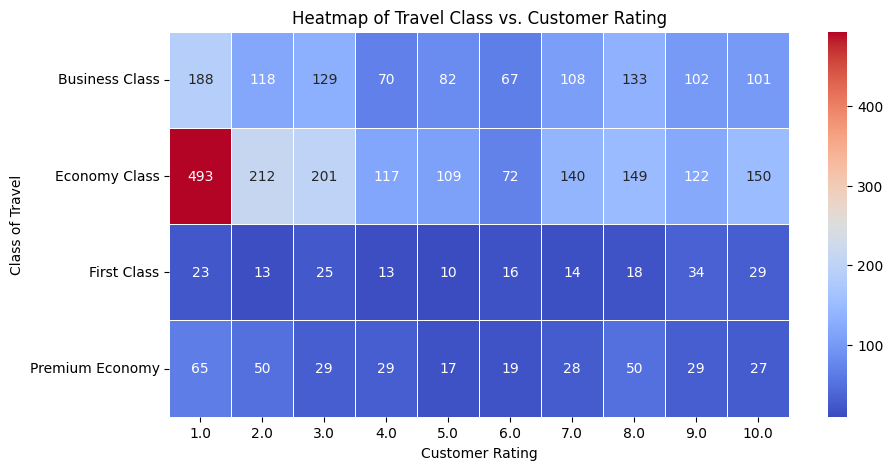

In [ ]:
#Visualization for Q1
plt.figure(figsize=(10, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Travel Class vs. Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Class of Travel')
plt.show()

##Research Q3


In [ ]:
# Combine 'Start' and 'Destination' into a 'Route' column
df3['Route'] = df3['Start'] + ' to ' + df3['Destination']

In [ ]:
# Define a function to calculate sentiment polarity from review content
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# Apply the sentiment analysis function to the review content
df3['Sentiment_Score'] = df3['Cleaned_Review_Content'].apply(calculate_sentiment)

In [ ]:
# Group the data by route
route_satisfaction = df3.groupby('Route').agg({
    'Rating': 'mean',
    'Sentiment_Score': 'mean'
}).reset_index()

In [ ]:
# Sort the routes by average rating for better visualization
route_satisfaction_sorted = route_satisfaction.sort_values('Rating', ascending=False)

In [ ]:
# Check the number of flights to each destination across different months and years
destination_counts = df3.groupby(['Year', 'Month', 'Destination']).size().reset_index(name='Flight_Counts')

In [ ]:
top_destinations = destination_counts.groupby('Destination')['Flight_Counts'].sum().nlargest(5).index
filtered_data = destination_counts[destination_counts['Destination'].isin(top_destinations)]

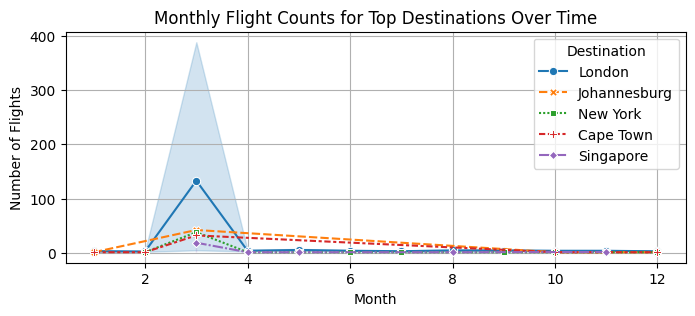

In [ ]:
# Now, create a line plot for the selected destinations
plt.figure(figsize=(8, 3))
sns.lineplot(data=filtered_data, x='Month', y='Flight_Counts', hue='Destination', style='Destination', markers=True)
plt.title('Monthly Flight Counts for Top Destinations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.legend(title='Destination')
plt.grid(True)
plt.show()

In [ ]:
# Rename the columns in the DataFrame to match the expected names in the plot code
route_satisfaction.rename(columns={'ActualNameForRating': 'Average_Rating', 'ActualNameForRoute': 'Route'}, inplace=True)



In [ ]:
# Then you can create your barplot with the renamed columns
plt.figure(figsize=(14, 7))
sns.barplot(data=route_satisfaction, x='Average_Rating', y='Route')
plt.title('Average Customer Rating by Route')
plt.xlabel('Average Rating')
plt.ylabel('Route')
plt.show()

ValueError: Could not interpret value `Average_Rating` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x700 with 0 Axes>

In [ ]:
from textblob import TextBlob

In [ ]:
# Replace destination names using the provided dictionary
df3['Destination'] = df3['Destination'].replace(cities)

In [ ]:
# After standardizing the route names, you can proceed with further analysis
# For example, count the number of flights to each standardized destination
destination_counts = df3['Destination'].value_counts().reset_index()
destination_counts.columns = ['Destination', 'Flight_Count']

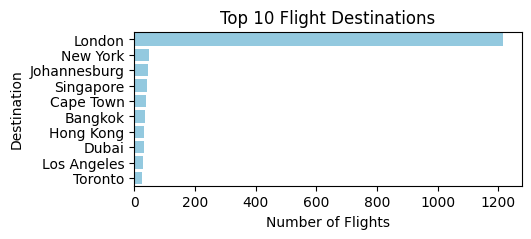

In [ ]:
# Visualize the top 10 flight destinations
plt.figure(figsize=(5, 2))
sns.barplot(x='Flight_Count', y='Destination', data=destination_counts.head(10), color="skyblue")
plt.title('Top 10 Flight Destinations')
plt.xlabel('Number of Flights')
plt.ylabel('Destination')
plt.show()

In [ ]:
Q3

In [ ]:
# Define a function to calculate sentiment polarity from review content
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# Apply the sentiment analysis function to the review content
df3['Sentiment_Score'] = df3['Cleaned_Review_Content'].apply(calculate_sentiment)

In [ ]:
# Group the data by route
route_satisfaction = df3.groupby('Destination').agg({
    'Rating': 'mean',
    'Sentiment_Score': 'mean'
}).reset_index()

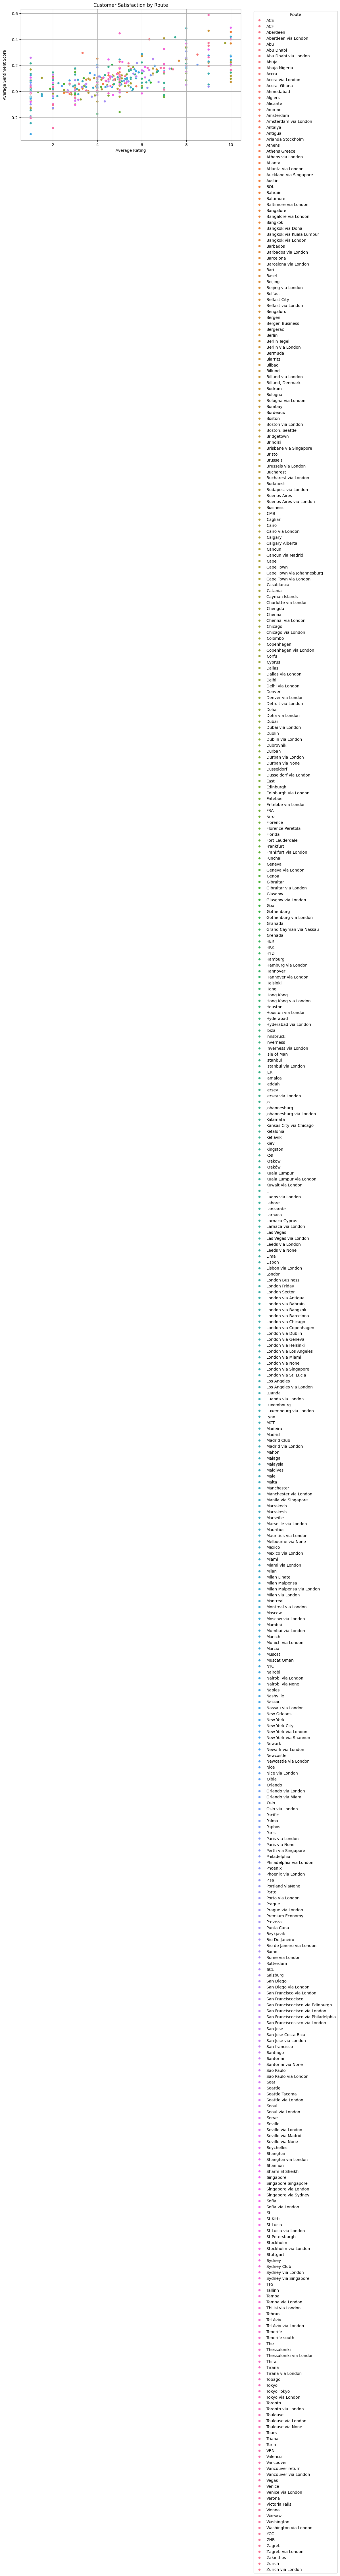

In [ ]:
# Visualize the results with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=route_satisfaction, x='Rating', y='Sentiment_Score', hue='Destination')
plt.title('Customer Satisfaction by Route')
plt.xlabel('Average Rating')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
from textblob import TextBlob

In [ ]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# Apply sentiment analysis on the cleaned review content
df3['Sentiment_Score'] = df3['Cleaned_Review_Content'].apply(get_sentiment)

In [ ]:
# Group by route and calculate average rating and sentiment
route_summary = df3.groupby('nRoute').agg({'Rating': 'mean', 'Sentiment_Score': 'mean'}).reset_index()

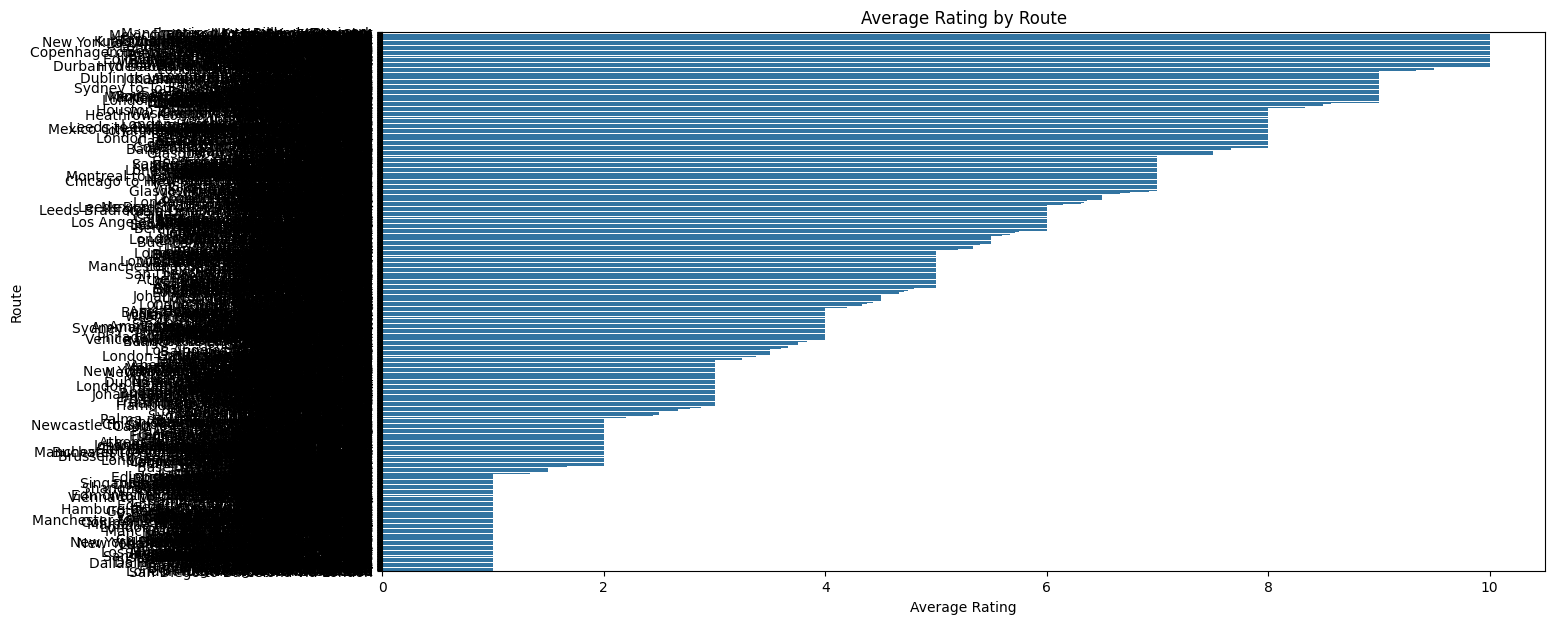

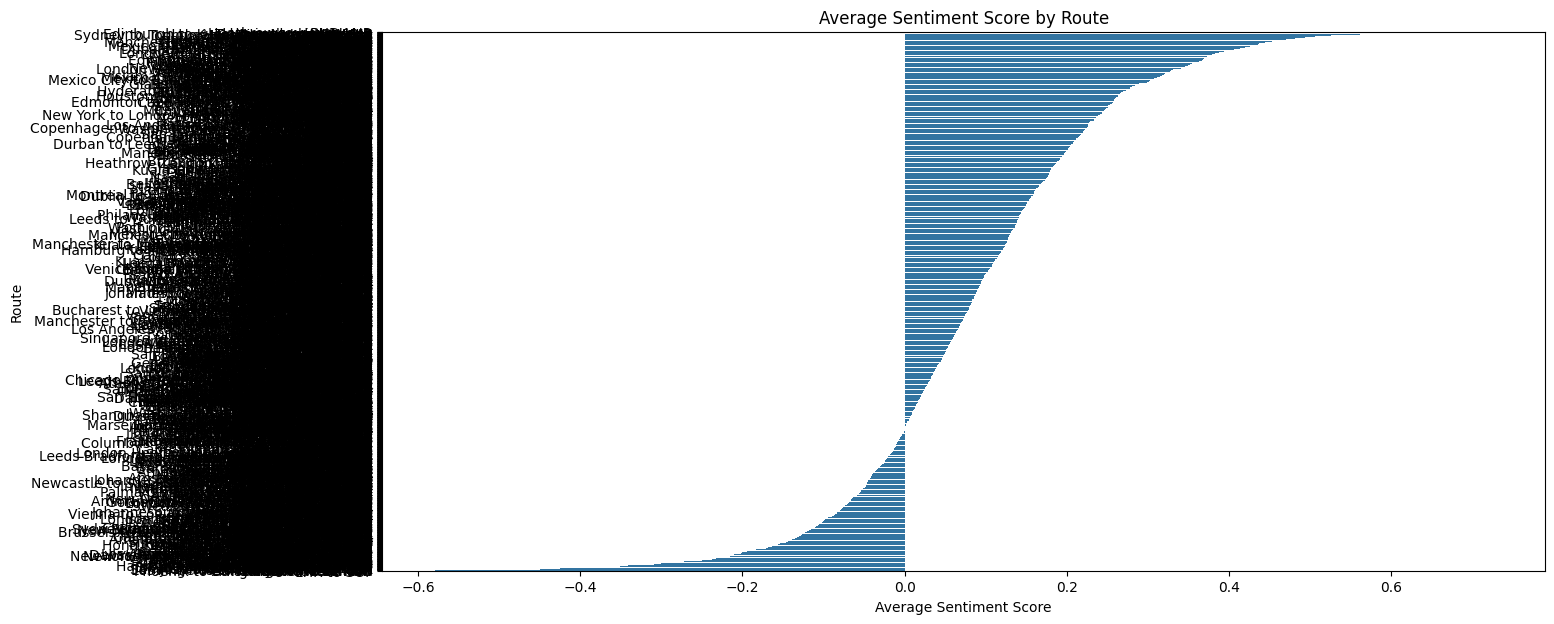

In [ ]:
# Rating visualization
plt.figure(figsize=(15, 7))
sns.barplot(x='Rating', y='nRoute', data=route_summary.sort_values('Rating', ascending=False))
plt.title('Average Rating by Route')
plt.xlabel('Average Rating')
plt.ylabel('Route')

# Sentiment Score visualization
plt.figure(figsize=(15, 7))
sns.barplot(x='Sentiment_Score', y='nRoute', data=route_summary.sort_values('Sentiment_Score', ascending=False))
plt.title('Average Sentiment Score by Route')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Route')

plt.show()

##Research Q4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df3.dtypes

Passanger_Name             object
Rating                    float64
Review_title               object
nClass                     object
nTravellertype             object
nRoute                     object
Year                        int64
Month                       int64
Cleaned_Review_Content     object
Start                      object
Destination                object
dtype: object

In [ ]:
# Remove parts of destinations that come after "via"
df3['Destination'] = df3['Destination'].apply(lambda x: x.split(' via')[0] if 'via' in x else x)

In [ ]:
# Group the data by Month and Destination and count the number of flights
monthly_destination_popularity = df3.groupby(['Month', 'Destination']).size().reset_index(name='Flight_Count')

In [ ]:
# Sort the data
monthly_destination_popularity = monthly_destination_popularity.sort_values(by=['Month', 'Flight_Count'], ascending=[True, False])

In [ ]:
# Preparing a DataFrame for the top 10 destinations for each month
top_10_monthly_destinations = pd.DataFrame()

In [ ]:
for month in range(1, 13):  # Months from 1 to 12
    # Get top 10 destinations for the month
    top_10 = monthly_destination_popularity[monthly_destination_popularity['Month'] == month].nlargest(10, 'Flight_Count')
    top_10['Month'] = month  # Add the month column
    top_10_monthly_destinations = top_10_monthly_destinations.append(top_10)

<ipython-input-102-73ca89373020>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_monthly_destinations = top_10_monthly_destinations.append(top_10)
<ipython-input-102-73ca89373020>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_monthly_destinations = top_10_monthly_destinations.append(top_10)
<ipython-input-102-73ca89373020>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_monthly_destinations = top_10_monthly_destinations.append(top_10)
<ipython-input-102-73ca89373020>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_monthly_destinations = top_10_monthly_destinations.append(top_10)
<ipython-input-102-73ca8

In [ ]:
# Sort and get the top 10 destinations for each month
top_destinations = destination_counts.sort_values(['Month', 'counts'], ascending=[True, False])
top_10_destinations = top_destinations.groupby('Month').head(10).copy()

In [ ]:
# Map month names to numbers
months_map = {v: k for k,v in enumerate(calendar.month_abbr)}
top_10_destinations['Month_Num'] = top_10_destinations['Month'].map(lambda x: months_map.get(x[:3].capitalize(), 0))

In [ ]:
# Filter out rows where Month_Num is 0 (unknown month names)
top_10_destinations = top_10_destinations[top_10_destinations['Month_Num'] != 0]

In [ ]:
# Plotting separate bar charts for each month
for month in sorted(top_10_destinations['Month_Num'].unique()):
    month_data = top_10_destinations[top_10_destinations['Month_Num'] == month]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=month_data, x='Destination', y='counts')
    plt.title(f'Top 10 Popular Destinations in {calendar.month_abbr[month]}')
    plt.xlabel('Destination')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Convert month names to numbers for sorting
month_to_num = {name: num for num, name in enumerate(calendar.month_name) if name}
top_10_destinations['Month_Num'] = top_10_destinations['Month'].map(month_to_num)

In [ ]:
# Ensure that NaN values are handled
top_10_destinations = top_10_destinations.dropna(subset=['Month_Num'])

In [ ]:
#Convert month names to numbers for sorting
month_to_num = {name: num for num, name in enumerate(calendar.month_name) if name}
top_10_destinations['Month_Num'] = top_10_destinations['Month'].map(month_to_num)

In [ ]:
# Plotting separate bar charts for each month
for month in sorted(top_10_destinations['Month_Num'].unique()):
    month_data = top_10_destinations[top_10_destinations['Month_Num'] == month]
    if month_data.empty:
        continue  # Skip plotting if no data for the month
    plt.figure(figsize=(12, 6))
    sns.barplot(data=month_data, x='Destination', y='counts')
    plt.title(f'Top 10 Popular Destinations in {calendar.month_name[int(month)]}')
    plt.xlabel('Destination')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

ValueError: cannot convert float NaN to integer

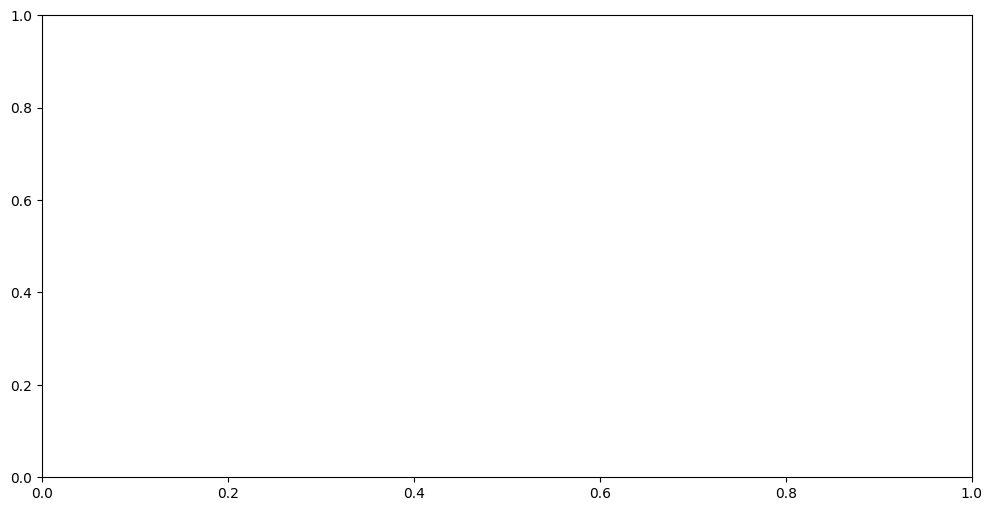

In [ ]:
# Plotting separate bar charts for each month
for month in sorted(top_10_destinations['Month_Num'].unique()):
    month_data = top_10_destinations[top_10_destinations['Month_Num'] == month]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=month_data, x='Destination', y='counts')
    plt.title(f'Top 10 Popular Destinations in {calendar.month_name[int(month)]}')  # Convert month to integer
    plt.xlabel('Destination')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

TypeError: list indices must be integers or slices, not numpy.float64

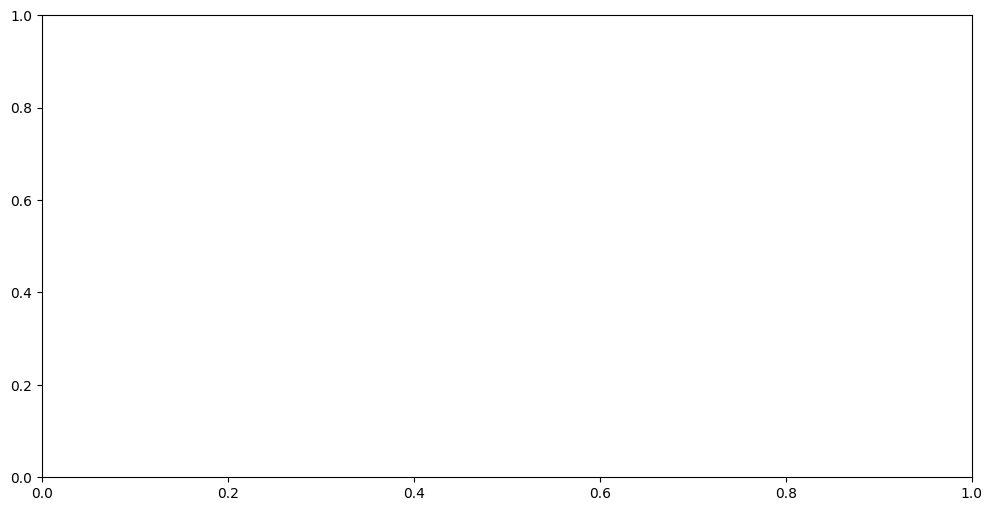

In [ ]:
# Plotting separate bar charts for each month
for month in sorted(top_10_destinations['Month_Num'].unique()):
    month_data = top_10_destinations[top_10_destinations['Month_Num'] == month]
    plt.figure(figsize=(12, 6))
    sns.barplot(data=month_data, x='Destination', y='counts')
    plt.title(f'Top 10 Popular Destinations in {calendar.month_name[month]}')
    plt.xlabel('Destination')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Get unique top 10 destinations
unique_top_destinations = top_10_destinations['Destination'].drop_duplicates().head(10)

In [ ]:
# Filter the data to include only the unique top 10 destinations
filtered_data = top_10_destinations[top_10_destinations['Destination'].isin(unique_top_destinations)]

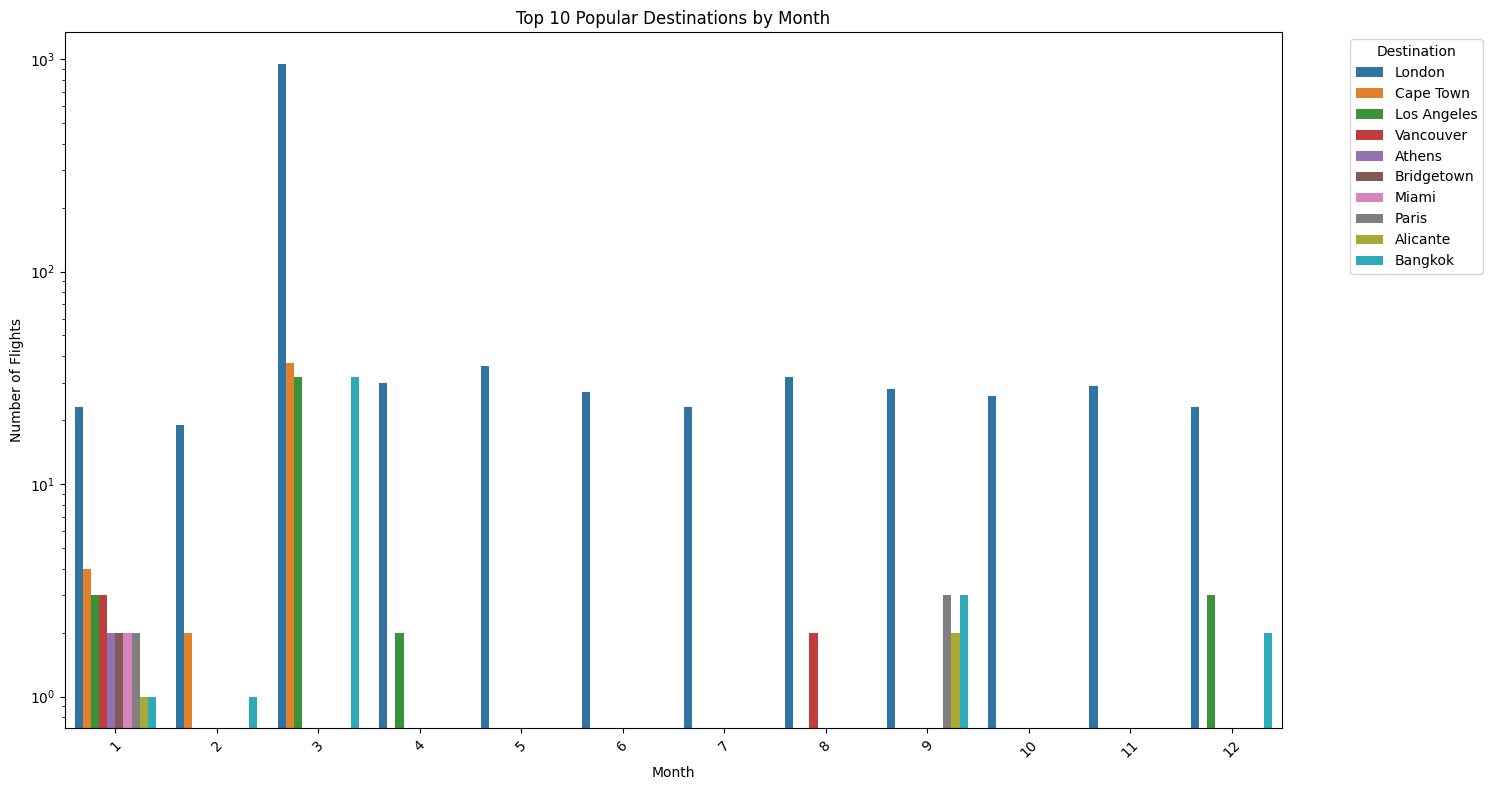

In [ ]:
# Plotting with a grouped bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Month', y='counts', hue='Destination', width=0.8)
plt.title('Top 10 Popular Destinations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate counts if there are duplicates
aggregated_counts = top_10_destinations.groupby(['Month', 'Destination']).agg({'counts': 'sum'}).reset_index()

In [ ]:
# Pivot for visualization using keyword arguments
pivot_table = aggregated_counts.pivot(index='Month', columns='Destination', values='counts')

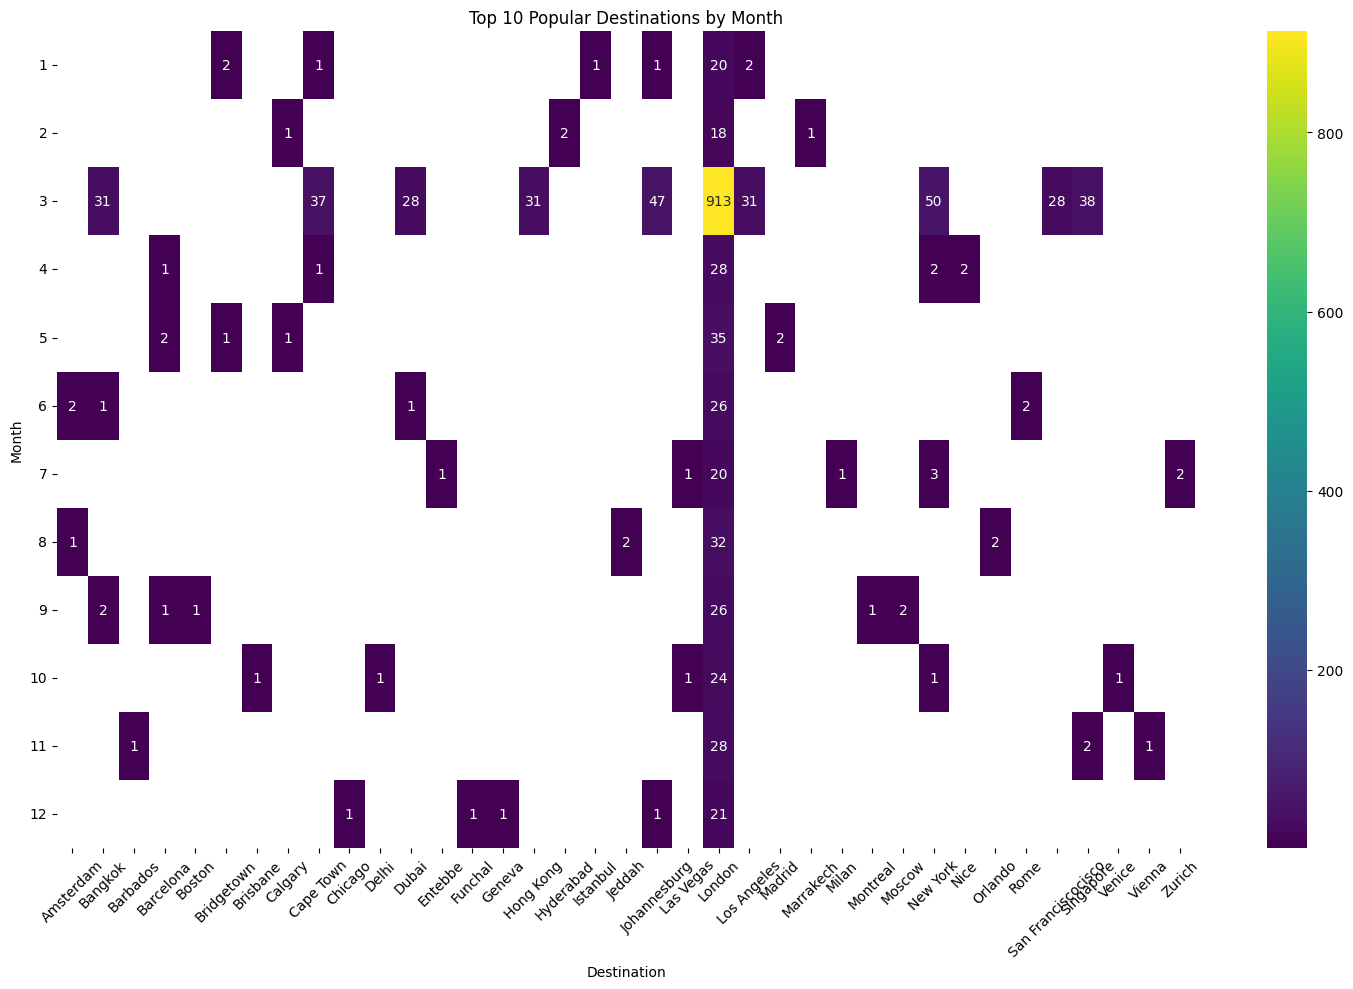

In [ ]:
# Visualization with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='viridis')
plt.title('Top 10 Popular Destinations by Month')
plt.xlabel('Destination')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Function to remove words after "via" including "via" itself
def remove_via(destination):
    if 'via' in destination:
        return destination.split('via')[0].strip()
    return destination

In [ ]:
# Apply the function to the 'Destination' column
df3['Destination'] = df3['Destination'].apply(remove_via)

In [ ]:
# Convert 'Flying_Month' to datetime to extract the month and year
#df3['Flying_Month'] = pd.to_datetime(df3['Flying_Month'], errors='coerce')
#df3['Month'] = df3['Flying_Month'].dt.month_name()
#df3['Year'] = df3['Flying_Month'].dt.year

In [ ]:
# Group by 'Destination' to get counts across all months and years
destination_counts = df3.groupby('Destination').size().reset_index(name='counts')

In [ ]:
# Sort the values and get the top 10 destinations overall
top_10_destinations = destination_counts.sort_values('counts', ascending=False).head(10).copy()

In [ ]:
# Ensure that 'Year' is converted to string for concatenation
#top_10_destinations['Year'] = top_10_destinations['Year'].astype(str)

In [ ]:
# Convert both 'Month' and 'Year' to string during concatenation
#top_10_destinations['Month_Year'] = top_10_destinations['Month'].astype(str) + ' ' + top_10_destinations['Year'].astype(str)

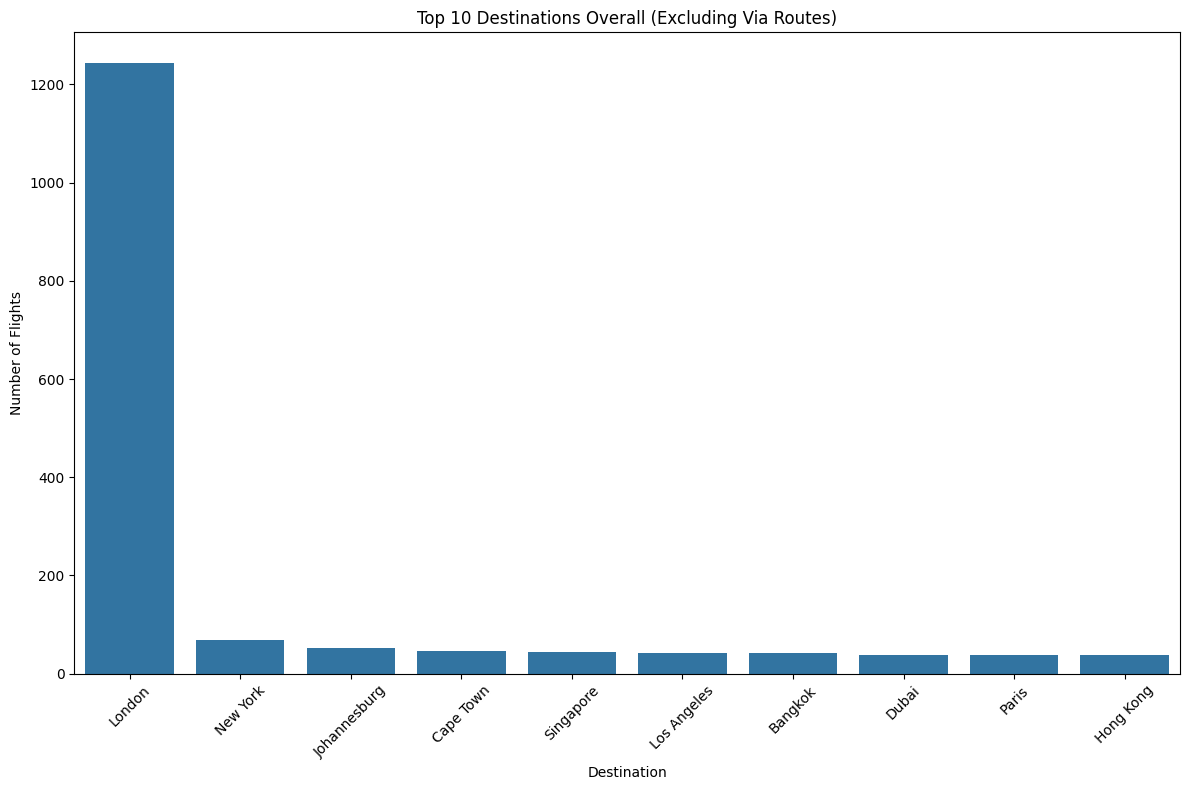

In [ ]:
# Plotting a bar chart for the top 10 destinations
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_destinations, x='Destination', y='counts')
plt.title('Top 10 Destinations Overall (Excluding Via Routes)')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Save into new file after processing
df3.to_csv('final.csv',index=False)

In [ ]:






# Create a concatenated month-year string for better visualization
top_10_destinations['Month_Year'] = top_10_destinations['Month'] + ' ' + top_10_destinations['Year']

# Plotting a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_destinations, x='Month_Year', y='counts', hue='Destination')
plt.title('Top 10 Destinations by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Create a concatenated month-year string for better visualization
top_10_destinations['Month_Year'] = top_10_destinations['Month'] + ' ' + top_10_destinations['Year'].astype(str)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

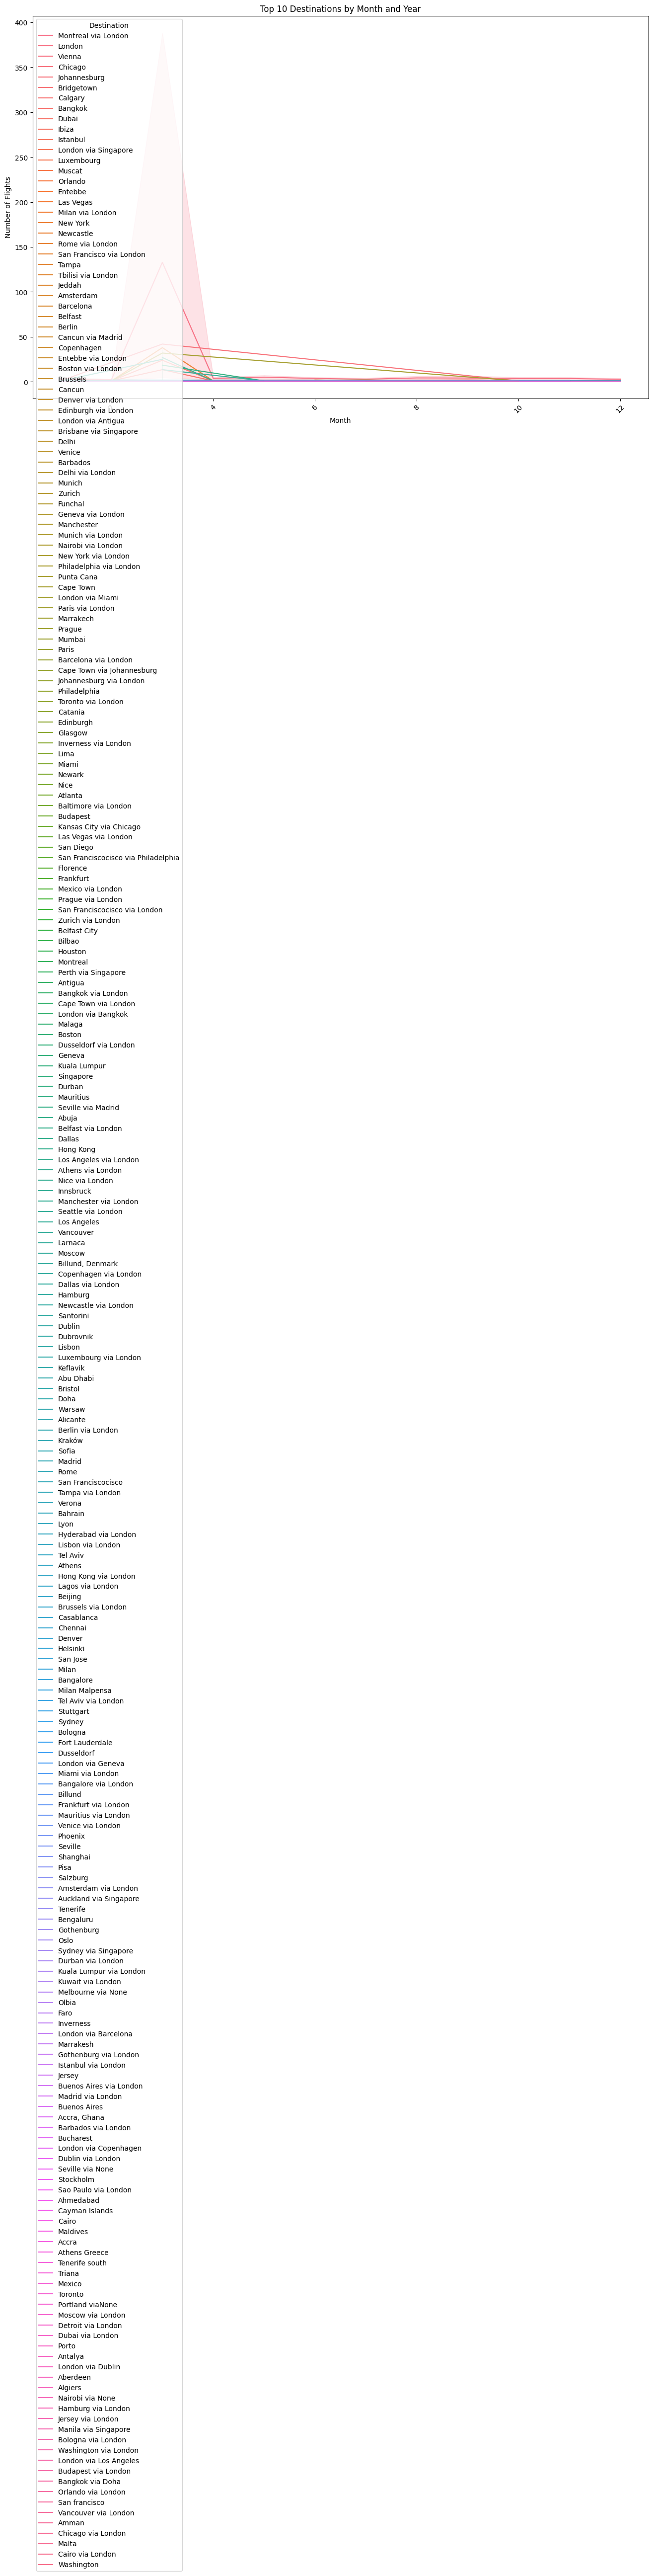

In [ ]:
plt.figure(figsize=(16, 10))  # Increased figure size
sns.lineplot(data=top_10_destinations, x='Month', y='counts', hue='Destination')
plt.title('Top 10 Destinations by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

In [ ]:
# Pivot the data for visualization
pivot_table = destination_counts.pivot_table(index=['Year', 'Month'], columns='Destination', values='counts', aggfunc='sum', fill_value=0)

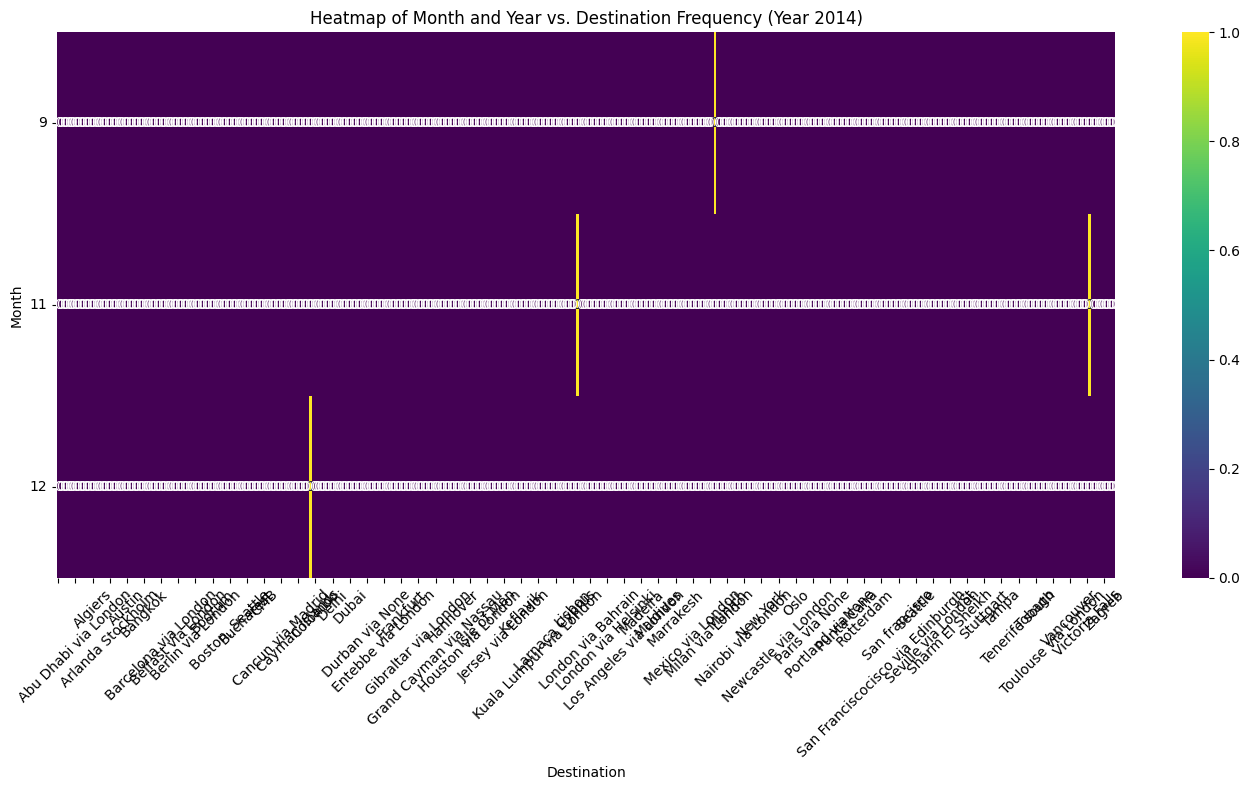

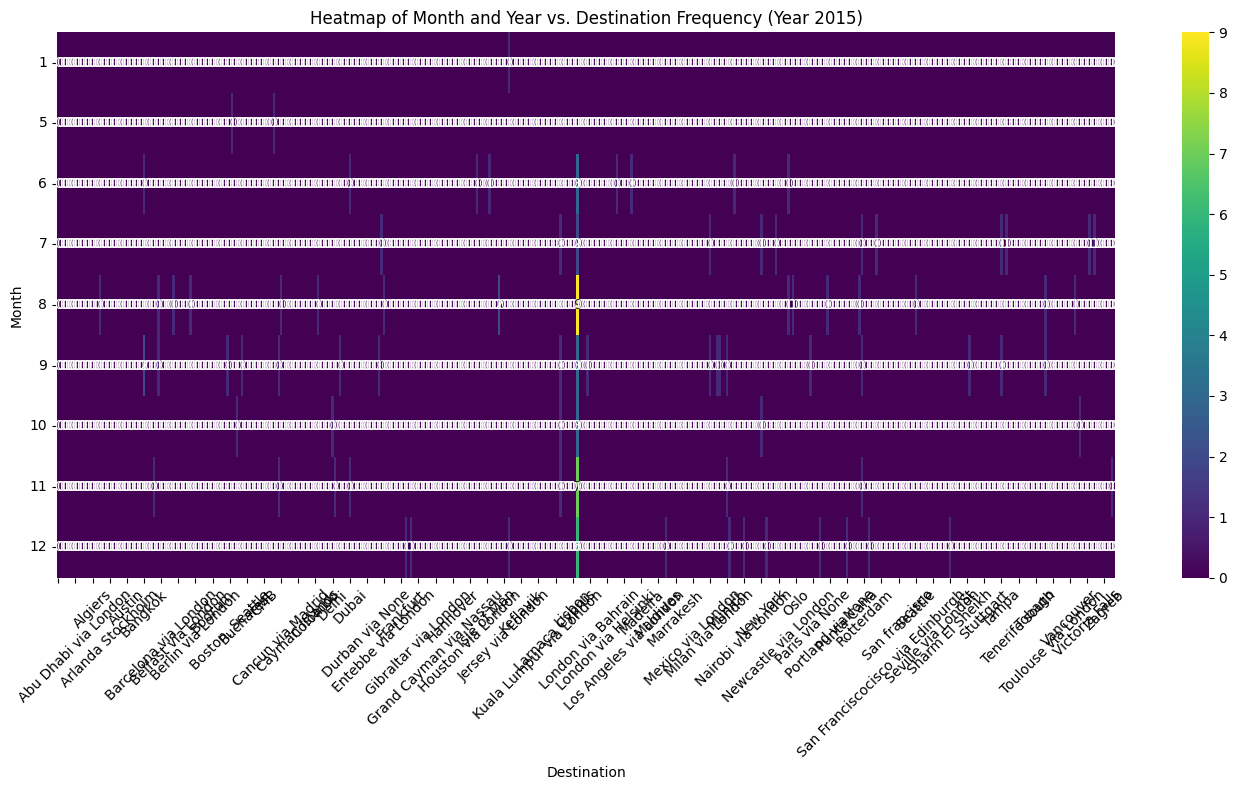

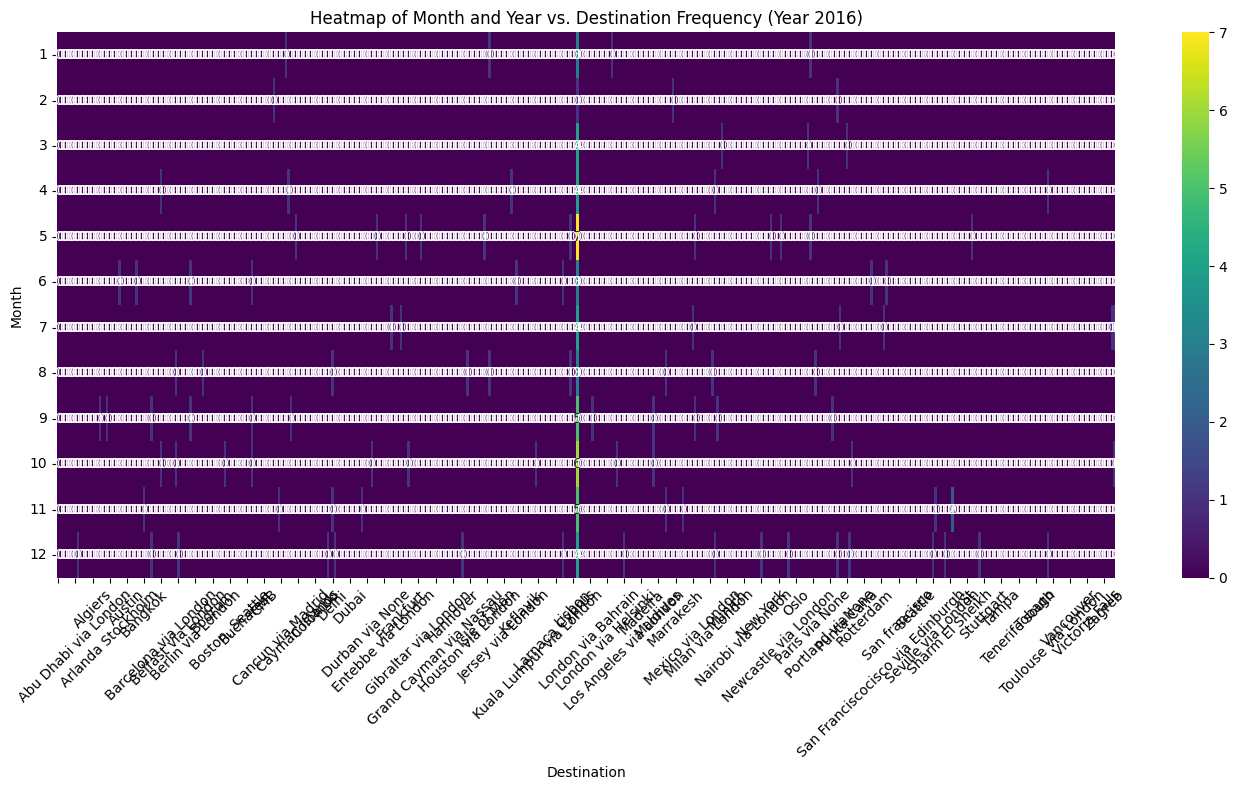

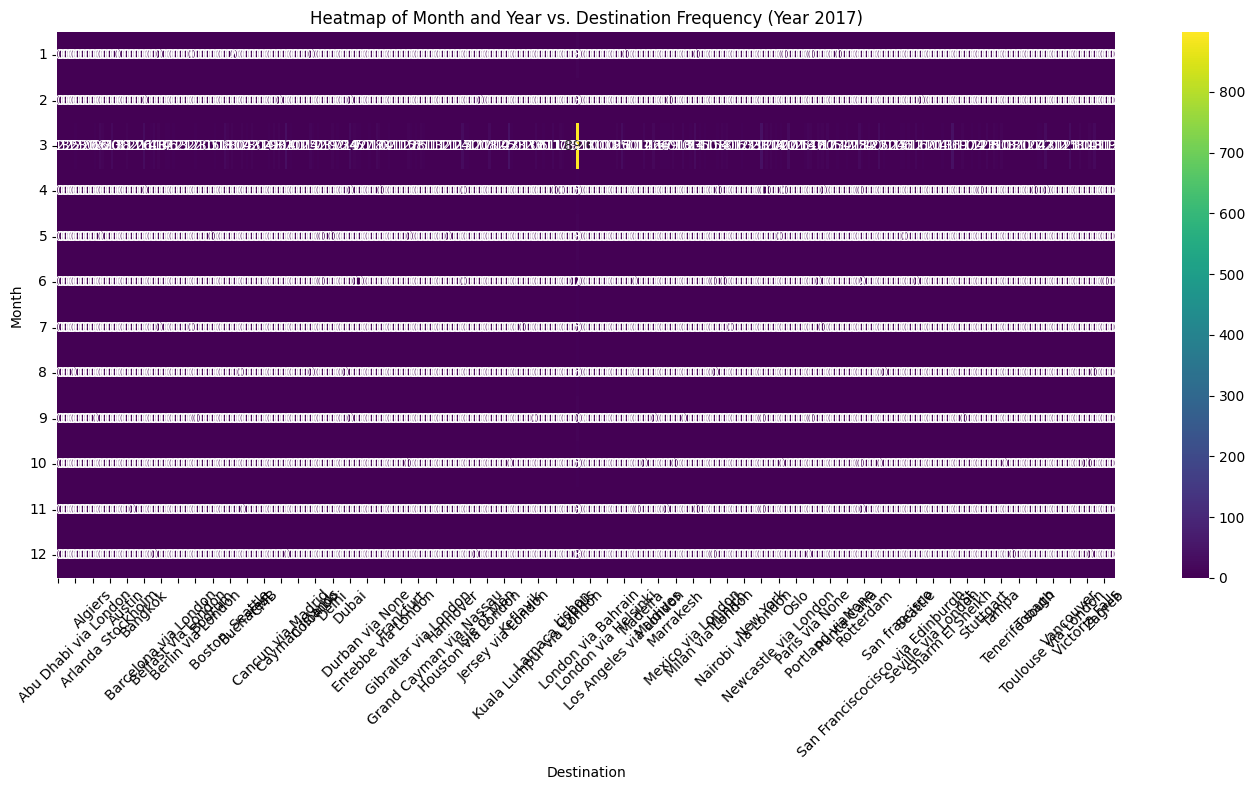

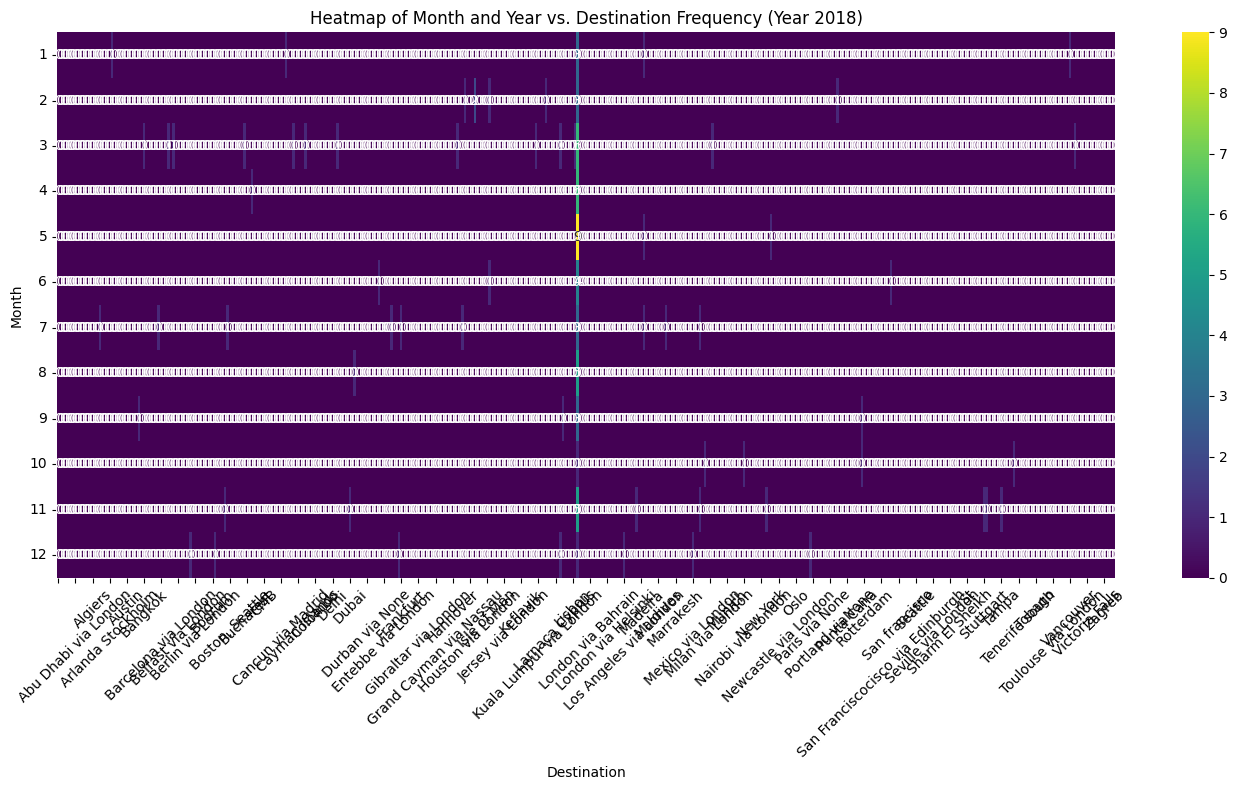

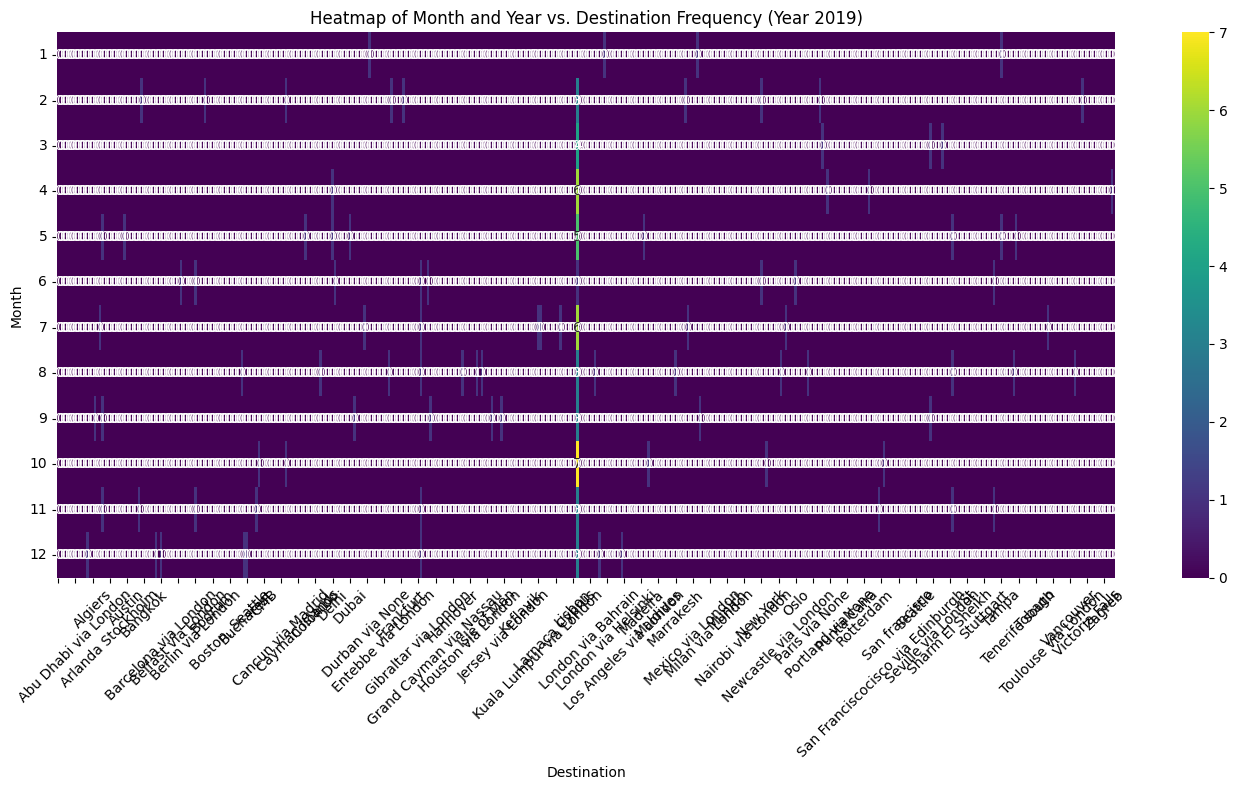

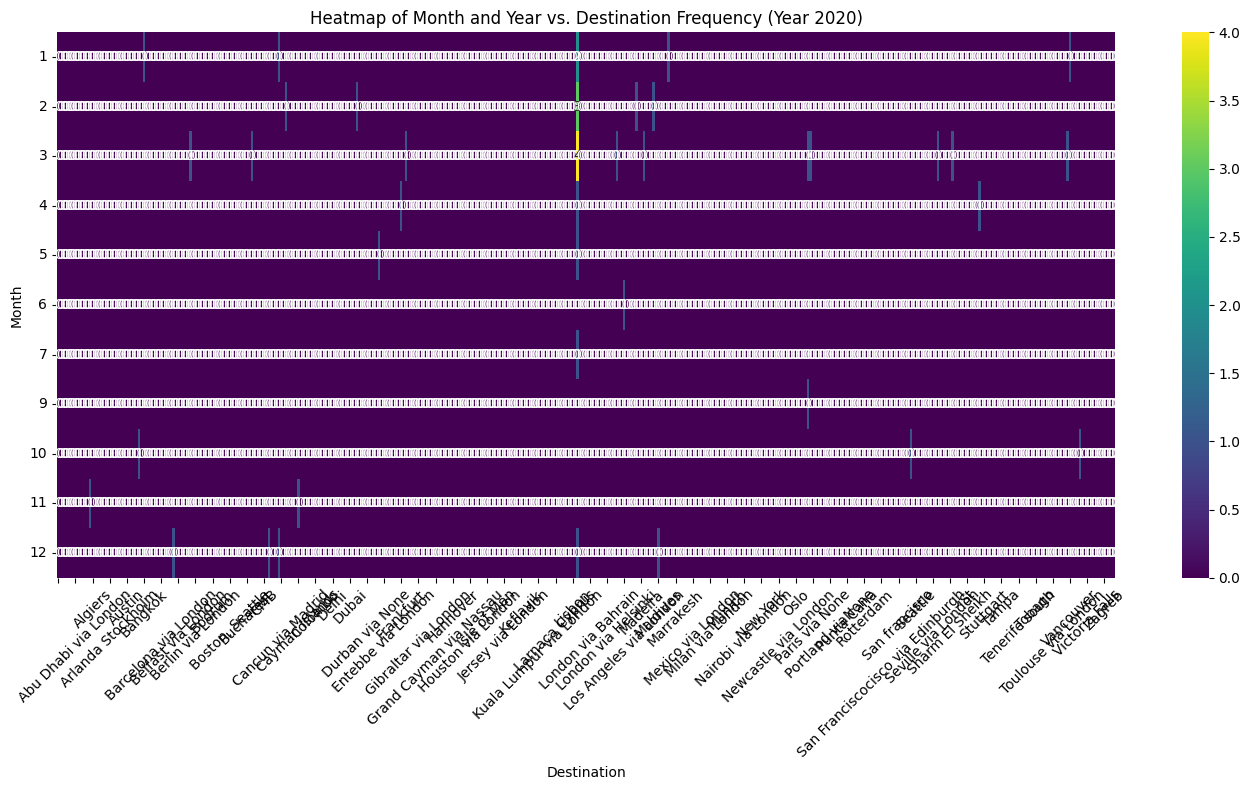

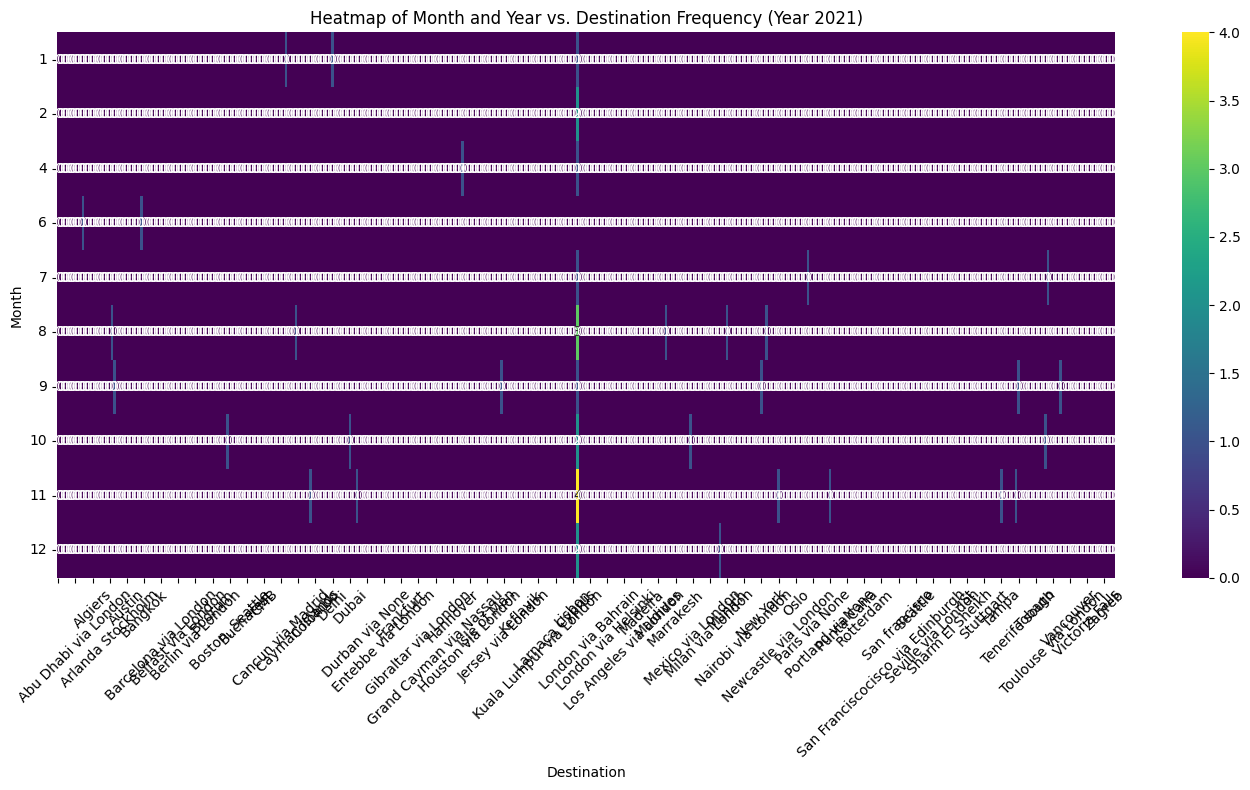

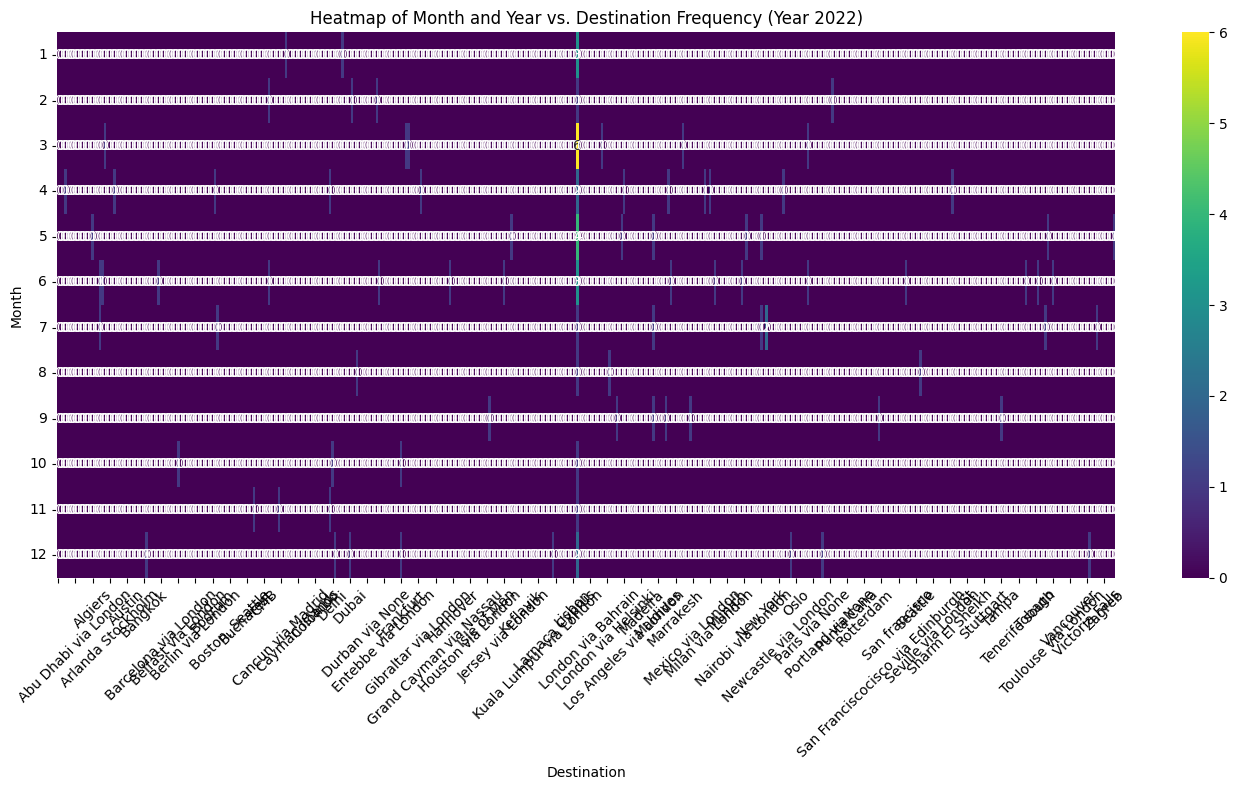

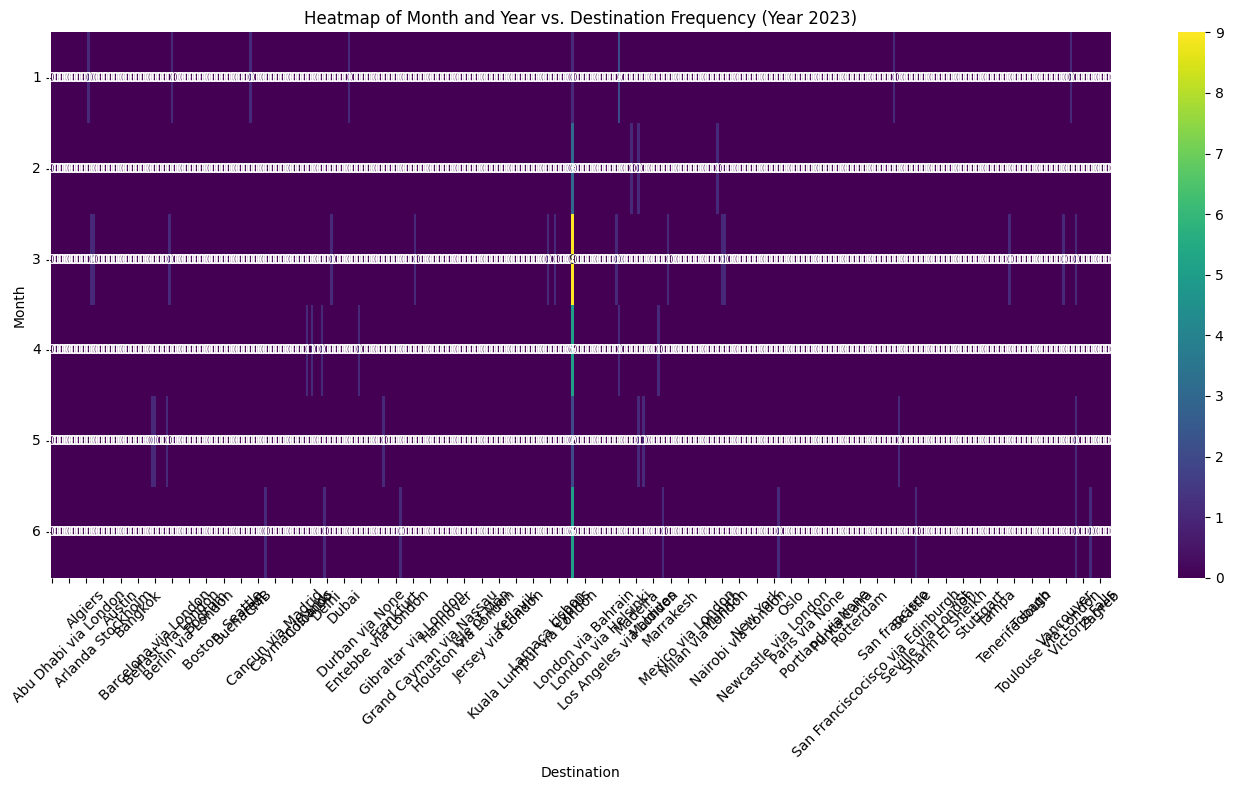

In [ ]:
# Visualization with a heatmap for each year
for year in pivot_table.index.get_level_values('Year').unique():
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_table.xs(year, level='Year'), annot=True, fmt='g', cmap='viridis')
    plt.title(f'Heatmap of Month and Year vs. Destination Frequency (Year {year})')
    plt.xlabel('Destination')
    plt.ylabel('Month')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

###Need to change data type of Route clolumn again
# Example mapping dictionary
route_mapping = {1: 'LDR-TTP', 2: 'London to Paris', ...}  # Fill in the complete mapping

# Apply the mapping to the 'Route' column
df3['Route'] = df3['Route'].map(route_mapping)

In [ ]:
# Plotting the data
for year in route_counts['Year'].unique():
    for month in route_counts['Month'].unique():
        subset = route_counts[(route_counts['Year'] == year) & (route_counts['Month'] == month)]

        # Skip the month if there's no data
        if subset.empty:
            continue

        plt.figure(figsize=(10, 6))
        plt.bar(subset['nRoute'], subset['Counts'])
        plt.title(f'Flight Counts for Routes - Year: {year}, Month: {month}')
        plt.xlabel('Route')
        plt.ylabel('Number of Flights')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
df3.head()

In [ ]:
# Save into new file after processing
df3.to_csv('dfcleanlast.csv',index=False)

##Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Add a new column for sentiment polarity
df3['Sentiment_Polarity'] = df['Review_content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the first few rows to see the sentiment scores
df3.head()


In [ ]:
#aggregate sentiment score and rating by route
agg_data = df3.groupby('nRoute').agg({'Sentiment_Polarity': 'mean', 'Rating': 'mean'}).reset_index()


In [ ]:
#Correlation Analysis
correlation = agg_data[['Sentiment_Polarity', 'Rating']].corr()


In [ ]:
#Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=agg_data)
plt.title('Relationship between Average Sentiment Polarity and Ratings per Route')
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [ ]:
###Dealing Missing value in nRoute Column
# Define a function to extract route from review content
def is_route(value):
    route_patterns = [
        r'\b[A-Z]{3}\s+to\s+[A-Z]{3}\b',                               # 'ABC to XYZ'
        r'\b[A-Z]{3}\s*-\s*[A-Z]{3}\b',                                # 'ABC - XYZ'
        r'\b[A-Z][a-z]+(?:\s*-\s*[A-Z][a-z]+)\b',                       # 'City-City'
        r'\b[A-Z][a-z]+(?:\s+to\s+|\s+via\s+)[A-Z][a-z]+(?:\s+[A-Z][a-z]+)?', # 'City to City', 'City via City'
        r'\bfrom\s+[A-Z][a-z]*\s+to\s+[A-Z][a-z]*'                      # 'from City to City'
    ]
    value_str = str(value)
    for pattern in route_patterns:
        match = re.search(pattern, value_str)
        if match:
            return match.group()
    return None


In [ ]:
# Apply the function to 'Review_content' to extract routes
df2['Extracted_Route'] = df2['Review_content'].apply(is_route)

In [ ]:
# Fill missing values in 'nRoute' with the extracted route
df2.loc[df['nRoute'].isnull(), 'nRoute'] = df2['Extracted_Route']

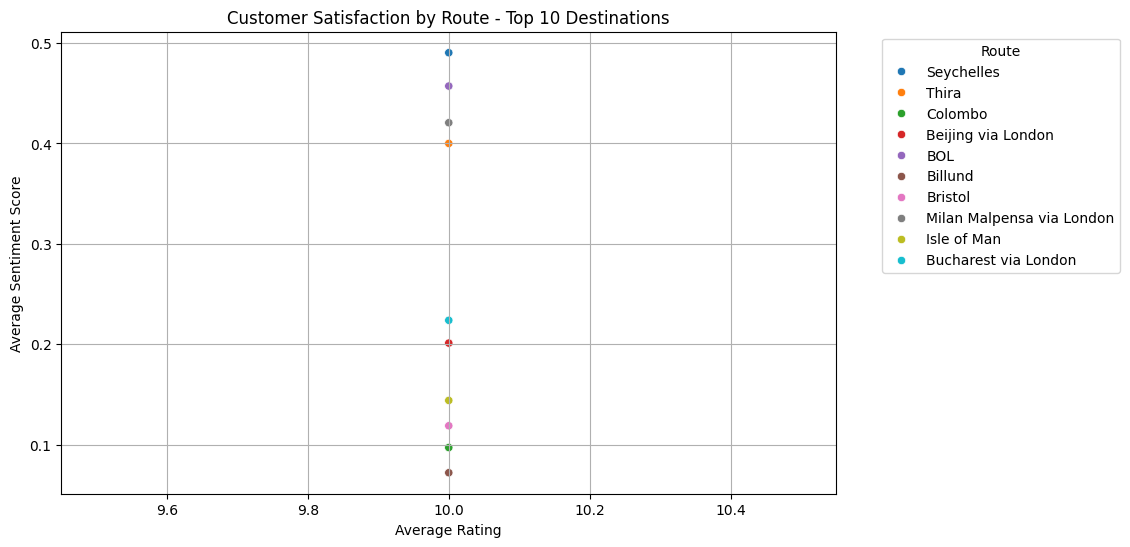

In [ ]:
# Assuming df3 is your original DataFrame
route_satisfaction = df3.groupby('Destination').agg({
    'Rating': 'mean',
    'Sentiment_Score': 'mean'
}).reset_index()

# Sort by 'Rating' in descending order and take the top 10
top_destinations = route_satisfaction.sort_values(by='Rating', ascending=False).head(10)

# Visualize the results with a scatter plot for the top 10 destinations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_destinations, x='Rating', y='Sentiment_Score', hue='Destination')
plt.title('Customer Satisfaction by Route - Top 10 Destinations')
plt.xlabel('Average Rating')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


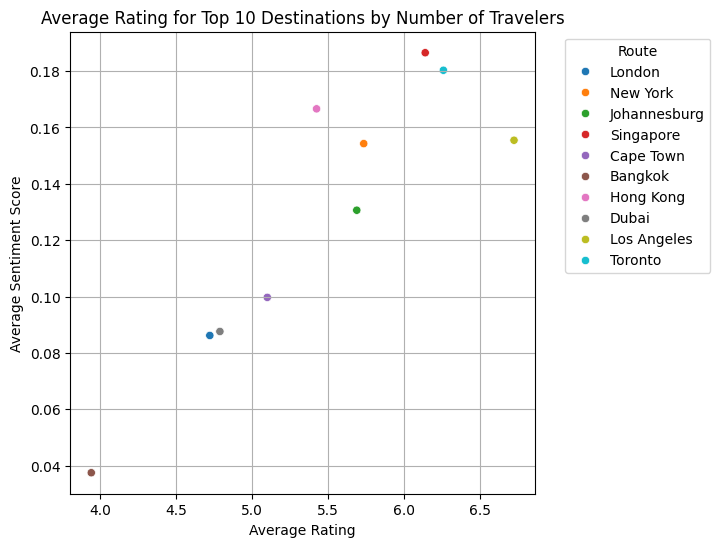

In [ ]:
# Calculate the count of travelers for each destination
destination_counts = df3['Destination'].value_counts().reset_index()
destination_counts.columns = ['Destination', 'Traveler_Count']

# Calculate average rating and sentiment score for each destination
route_satisfaction = df3.groupby('Destination').agg({
    'Rating': 'mean',
    'Sentiment_Score': 'mean'
}).reset_index()

# Merge the counts with the route_satisfaction DataFrame
merged_data = pd.merge(route_satisfaction, destination_counts, on='Destination')

# Sort by 'Traveler_Count' in descending order and take the top 10
top_destinations_by_travelers = merged_data.sort_values(by='Traveler_Count', ascending=False).head(10)

# Visualize the results with a scatter plot for the top 10 destinations
plt.figure(figsize=(6, 6))
sns.scatterplot(data=top_destinations_by_travelers, x='Rating', y='Sentiment_Score', hue='Destination')
plt.title('Average Rating for Top 10 Destinations by Number of Travelers')
plt.xlabel('Average Rating')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
